# Economy and migration in Europe : Is immigration a burden for the european economy ?

* [Introduction](#Introduction)
    * [Describe the data : Introduction of the datasets used](#describe)
    
* [Data management and transformation](#datamt)
    * [Dataset n°1 : Immigration](#dataset1)
    * [Dataset n°2 : Population](#dataset2)
    * [Dataset n°3 : GDP per capita](#dataset3)
    * [Dataset n°4 : Inequality of income distribution](#dataset4)
    * [Dataset n°5 : Unemployment](#dataset5)
    * [Dataset n°6 : Expenditure on social protection](#dataset6)
    * [Dataset n°7 : GDP](#dataset7)
    
* [Descriptive analysis](#analysis)
  * [Visualization : Migration rate & GDP per hab](#visualization1)
  * [Visualization : Migration rate and unemployment rate](#visualization2)
  
* [Simple regression](#simplereg)

* [Multiple regression](#multreg)
  * [Time series analysis](#timeseries)
  
* [Fake data simulation : exploration of model validity](#fakedata)

* [Diagnostics & model evaluation](#diag)

* [Identification & causality](#id&caus)

* [Conclusion](#conclu)

# Introduction <a class="anchor" id="Introduction"></a>

For all my projects of data exploration, I want to do them according to a social fact. Migration, gender inequality, inequality in general...

At the beginning, I found a time-series dataset form a survey in developping countries - mostly the lowest and poorest - . The survey focused on the women on differents regions of each countries and their living characteristics.
This dataset included a lot of variables : age mean, percentage of women working, having child, smoking...
And also climate variables : the number of months with drought or the "Standardized Precipitation Evapotranspiration Index (SPEI)".

Unfortunately, even this dataset is really intersting, it was quite hard to find a problemtic to answer to and also to find another dataset to combine with.

Despite that, I found my project topic : immigration and economics : Is immigration a burden for the european economy ?

This question arised to me from the stereotype - mostly said by french extreme right-wing politicians- migrants have a negative impact on the french economy. They mainly said migrants came to France to be paid to not work so increase the unemployment. As we know, french politicians are not the only one who think like this in Europe.

I have wanted to answer to this problematic with an economic point of view due to my studies - Master degree in Economics - and also beacause there is a lot of impacts and consequences of immigration on an economy of a country. Moreover, the economy of a country is easily interpretable and understandable.

I had to select some statistics variables which can represent an economy.

Obviously, we have the GDP variable : the reflect of the "healthiness" of an economy.

But we have also :

- The unemployment rate : the percentage of people who are unemployed
- Population
- Inequality of income distribution
- The expenditure on social protection : how much public institutions spend 

### Describe the data : Introduction of the datasets used <a class="anchor" id="describe"></a>

All of the datasets used were find on the webiste of EuroStat https://ec.europa.eu/eurostat/en/.

According to Wikipédia, _"Eurostat's main responsibilities are to provide statistical information to the institutions of the European Union (EU) and to promote the harmonisation of statistical methods across its member states and candidates for accession as well as EFTA countries. The organisations in the different countries that cooperate with Eurostat are summarised under the concept of the European Statistical System."_

#### - Dataset n°1 - Immigration :

 - ##### For what purpose ? 

   It's the total number of long-term immigrants arriving into the reporting country during the reference year over time.
   
- ##### How were they obtained ?
        
  With the process of the census, they can count the number of migrants due to their native country.

#### - Dataset n°2 - Population :

- ##### How were they obtained ?
        
  With the process of the census, each country count the number of people who lives there.

#### - Dataset n°3 - GDP per capita :

 
 - ##### For what purpose ? 

   GDP is a great measur of healthiness of an economy but quite hard to compare several GDP of countries. GD per capita is a good measure to solve this issue. It's how much the country spend per capitain euros.
 
- ##### How were they obtained ?
        
   
   The indicator is calculated as the ratio of real GDP to the average population of a specific year. GDP measures the value of total final output of goods and services produced by an economy within a certain period of time. It includes goods and services that have markets (or which could have markets) and products which are produced by general government and non-profit institutions. It is a measure of economic activity and is also used as a proxy for the development in a country’s material living standards. However, it is a limited measure of economic welfare. For example, neither does GDP include most unpaid household work nor does GDP take account of negative effects of economic activity, like environmental degradation.
   

#### - Dataset n°4 - Inequality of income distribution :


 - ##### For what purpose ? 

   It enables to measure the inequality of income over a population and compare it through several countries.
   
- ##### How were they obtained ?
        
  It's the ratio of total income received by the 20 % of the population with the highest income (top quintile) to that received by the 20 % of the population with the lowest income (lowest quintile). Income must be understood as equivalised disposable income.

#### - Dataset n°5 - Unemployment :

  
 - ##### For what purpose ? 

   To see in 2021 what is the percentage of unemployed people for each country.
   
- ##### How were they obtained ?
        
  With the process of the census, they can count the number of migrants due to their native country and after that, compare to the number of people who live in France.

#### - Dataset n°6 - Expenditure on social protection :

 - ##### For what purpose ? 

   To have a look on the percentage of gross domestic product (GDP) which is spend on social protection.
   
- ##### How were they obtained ?
        
  The expenditure on social protection contain: social benefits, which consist of transfers, in cash or in kind, to households and individuals to relieve them of the burden of a defined set of risks or needs; administration costs, which represent the costs charged to the scheme for its management and administration; other expenditure, which consists of miscellaneous expenditure by social protection schemes (payment of property income and other). It is calculated in current prices.

#### - Dataset n°7 - GDP :

 - ##### For what purpose ? 

   To have a look on the gross domestic product (GDP) over time for each country. It's in million of euros.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spt

#new packag# Economy and migration in France : Is immigration a burden for the french economy ?es
import statsmodels as sms
import statsmodels.formula.api as smf
import seaborn as sns

from cycler import cycler

import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors

# Data management and transformation <a class="anchor" id="datamt"></a>

## Dataset n°1 : Immigration <a class="anchor" id="dataset1"></a>

In [2]:
mig = pd.read_excel("Immigration.xlsx", "Sheet 1", skiprows=11)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
mig.head()

,TIME,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),:,:,:,2890780,3155818,4055071,3693495,3751814,3942303,4216138,3268760,3744277
2,Euro area – 20 countries (from 2023),:,:,:,:,:,:,:,:,:,:,:,:
3,Euro area - 19 countries (2015-2022),:,:,:,:,:,:,:,:,:,:,:,:
4,Belgium,135281,147377,129477,120078,123158,146626,123702,126703,137860,150006,118683,139743


In [4]:
mig = mig.melt(id_vars="TIME", 
        var_name="Year", 
        value_name="Immigration")
mig.head()

,TIME,Year,Immigration
0,GEO (Labels),2010,NaN
1,European Union - 27 countries (from 2020),2010,:
2,Euro area – 20 countries (from 2023),2010,:
3,Euro area - 19 countries (2015-2022),2010,:
4,Belgium,2010,135281


In [5]:
mig = mig.drop([mig.index[0], mig.index[2], mig.index[3],mig.index[657],
               mig.index[658], mig.index[659]])
mig.head()

,TIME,Year,Immigration
1,European Union - 27 countries (from 2020),2010,:
4,Belgium,2010,135281
5,Bulgaria,2010,:
6,Czechia,2010,48317
7,Denmark,2010,52236


In [6]:
mig.tail()

,TIME,Year,Immigration
652,Kyrgyzstan,2021,:
653,Tajikistan,2021,:
654,Uzbekistan,2021,:
655,Armenia,2021,:
656,Azerbaijan,2021,:


In [7]:
mig = mig.replace(":",np.nan)

In [8]:
mig.head()

,TIME,Year,Immigration
1,European Union - 27 countries (from 2020),2010,NaN
4,Belgium,2010,135281
5,Bulgaria,2010,NaN
6,Czechia,2010,48317
7,Denmark,2010,52236


## Dataset n°2 : Population <a class="anchor" id="dataset2"></a>

In [9]:
pop = pd.read_excel("Population.xlsx", "Sheet 1", skiprows=7)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [10]:
pop.head()

,TIME,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),440552661,441257711,442883888,443666812,444802830,445534430,446208557,446559279,447485231,447000548,446735291,448387872
2,Euro area – 20 countries (from 2023),339564908,340307106,342011161,342787437,343978656,344695355,345358497,345713148,346632956,346670757,346731402,349256040
3,Euro area - 19 countries (2015-2022),335288924,336044966,337764352,338562121,339787987,340541142,341253004,341636902,342574791,342561034,342805884,345405146
4,Belgium,11075889,11137974,11180840,11237274,11311117,11351727,11398589,11455519,11522440,11554767,11617623,11754004


In [11]:
pop = pop.melt(id_vars="TIME", 
        var_name="Year", 
        value_name="Population")

In [12]:
pop.head()

,TIME,Year,Population
0,GEO (Labels),2012,NaN
1,European Union - 27 countries (from 2020),2012,440552661
2,Euro area – 20 countries (from 2023),2012,339564908
3,Euro area - 19 countries (2015-2022),2012,335288924
4,Belgium,2012,11075889


In [13]:
pop.tail()

,TIME,Year,Population
679,Armenia,2023,2977130
680,Azerbaijan,2023,10127145
681,NaN,2023,NaN
682,Special value,2023,NaN
683,:,2023,NaN


In [14]:
pop = pop.drop([pop.index[0], pop.index[2], pop.index[3], pop.index[681], pop.index[682], pop.index[683] ])
pop.head()

,TIME,Year,Population
1,European Union - 27 countries (from 2020),2012,440552661
4,Belgium,2012,11075889
5,Bulgaria,2012,7327224
6,Czechia,2012,10505445
7,Denmark,2012,5580516


In [15]:
pop = pop.replace(":",np.nan)

In [16]:
pop.tail()

,TIME,Year,Population
676,Monaco,2023,NaN
677,Russia,2023,NaN
678,San Marino,2023,33812
679,Armenia,2023,2977130
680,Azerbaijan,2023,10127145


## Dataset n°3 : GDP per capita <a class="anchor" id="dataset3"></a>

In [17]:
gdp = pd.read_excel("GDP_per_capita.xlsx", "Sheet 1", skiprows=8)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [18]:
gdp.head()

,TIME,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),22450,22900,23100,23210,23710,24070,24820.0,25510.0,25590.0,...,25060.0,25430.0,25960.0,26410.0,27110.0,27620.0,28060.0,26450,28050,28950
2,European Union - 28 countries (2013-2020),22990,23470,23710,23930,24430,24830,25570.0,26230.0,26250.0,...,25780.0,26180.0,26710.0,27140.0,27800.0,28270.0,28690.0,:,:,:
3,Euro area – 20 countries (from 2023),26240,26740,26850,26890,27360,27670,28440.0,29140.0,29120.0,...,28220.0,28560.0,29060.0,29510.0,30220.0,30690.0,31080.0,29150,30880,31800
4,Euro area - 19 countries (2015-2022),26490,26980,27090,27120,27590,27900,28670.0,29370.0,29340.0,...,28450.0,28790.0,29290.0,29740.0,30450.0,30910.0,31300.0,29360,31080,31990


In [19]:
gdp = gdp.melt(id_vars="TIME", 
        var_name="Year", 
        value_name="GDP_per_capita")

In [20]:
gdp.head()

,TIME,Year,GDP_per_capita
0,GEO (Labels),2000,NaN
1,European Union - 27 countries (from 2020),2000,22450
2,European Union - 28 countries (2013-2020),2000,22990
3,Euro area – 20 countries (from 2023),2000,26240
4,Euro area - 19 countries (2015-2022),2000,26490


In [21]:
gdp.tail()

,TIME,Year,GDP_per_capita
1007,Serbia,2022,6230
1008,Türkiye,2022,13380
1009,NaN,2022,NaN
1010,Special value,2022,NaN
1011,:,2022,NaN


In [22]:
gdp = gdp.drop([gdp.index[0], gdp.index[2], gdp.index[3], gdp.index[1009], gdp.index[1010], gdp.index[1011] ])
gdp.head()

,TIME,Year,GDP_per_capita
1,European Union - 27 countries (from 2020),2000,22450
4,Euro area - 19 countries (2015-2022),2000,26490
5,Belgium,2000,29890
6,Bulgaria,2000,2990
7,Czechia,2000,11230


In [23]:
gdp.tail()

,TIME,Year,GDP_per_capita
1004,Montenegro,2022,6650
1005,North Macedonia,2022,:
1006,Albania,2022,:
1007,Serbia,2022,6230
1008,Türkiye,2022,13380


In [24]:
gdp = gdp.replace(":",np.nan)

In [25]:
gdp.tail()

,TIME,Year,GDP_per_capita
1004,Montenegro,2022,6650
1005,North Macedonia,2022,NaN
1006,Albania,2022,NaN
1007,Serbia,2022,6230
1008,Türkiye,2022,13380


## Dataset n°4 : Inequality of income distribution <a class="anchor" id="dataset4"></a>

In [26]:
ine =pd.read_excel("Inequality.xlsx", "Sheet 1", skiprows=9)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [27]:
ine.head()

,TIME,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),4.99,4.98,5.05,5.22,5.22,5.16,5.03,5.05,4.99,4.89,4.99,4.74
2,Euro area – 20 countries (from 2023),:,:,:,5.22,5.16,5.15,5.04,5.07,4.98,4.93,5.04,4.79
3,Euro area - 19 countries (2015-2022),5,4.98,5.05,5.23,5.16,5.15,5.05,5.07,4.98,4.93,5.02,:
4,Belgium,3.86,3.95,3.81,3.81,3.83,3.85,3.84,3.79,3.61,3.65,3.42,3.57


In [28]:
ine = ine.melt(id_vars="TIME", 
        var_name="Year", 
        value_name="Inequality_of_income_distribution")

In [29]:
ine.head()

,TIME,Year,Inequality_of_income_distribution
0,GEO (Labels),2011,NaN
1,European Union - 27 countries (from 2020),2011,4.99
2,Euro area – 20 countries (from 2023),2011,:
3,Euro area - 19 countries (2015-2022),2011,5
4,Belgium,2011,3.86


In [30]:
ine.tail()

,TIME,Year,Inequality_of_income_distribution
535,Türkiye,2022,:
536,Kosovo*,2022,:
537,NaN,2022,NaN
538,Special value,2022,NaN
539,:,2022,NaN


In [31]:
ine = ine.drop([ine.index[0], ine.index[2], ine.index[3], ine.index[537], ine.index[538], ine.index[539] ])
ine.head()

,TIME,Year,Inequality_of_income_distribution
1,European Union - 27 countries (from 2020),2011,4.99
4,Belgium,2011,3.86
5,Bulgaria,2011,6.46
6,Czechia,2011,3.54
7,Denmark,2011,3.98


In [32]:
ine.head()

,TIME,Year,Inequality_of_income_distribution
1,European Union - 27 countries (from 2020),2011,4.99
4,Belgium,2011,3.86
5,Bulgaria,2011,6.46
6,Czechia,2011,3.54
7,Denmark,2011,3.98


In [33]:
ine.tail()

,TIME,Year,Inequality_of_income_distribution
532,North Macedonia,2022,:
533,Albania,2022,:
534,Serbia,2022,:
535,Türkiye,2022,:
536,Kosovo*,2022,:


In [34]:
ine = ine.replace(":",np.nan)

In [35]:
ine.tail()

,TIME,Year,Inequality_of_income_distribution
532,North Macedonia,2022,NaN
533,Albania,2022,NaN
534,Serbia,2022,NaN
535,Türkiye,2022,NaN
536,Kosovo*,2022,NaN


## Dataset n°5 : Unemployment <a class="anchor" id="dataset5"></a>

In [36]:
un =pd.read_excel("Unemployment.xlsx", "Sheet 2", skiprows=9)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [37]:
un.head()

,TIME,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),:,:,:,:,:,:,9.3,10.1,10.1,...,11.6,11.0,10.2,9.3,8.3,7.4,6.8,7.2,7.1,6.2
2,Euro area – 20 countries (from 2023),:,:,:,:,:,:,9.7,10.3,10.3,...,12.2,11.7,11.0,10.1,9.1,8.2,7.6,8.0,7.7,6.8
3,Belgium,:,:,:,:,:,:,8.0,8.4,7.2,...,8.6,8.7,8.7,7.9,7.2,6.0,5.5,5.8,6.3,5.6
4,Bulgaria,:,:,:,:,:,:,7.9,11.3,12.3,...,13.9,12.4,10.1,8.6,7.2,6.2,5.2,6.1,5.3,4.3


In [38]:
un = un.melt(id_vars="TIME", 
        var_name="Year", 
        value_name="Unemployment_rate")

In [39]:
un.head()

,TIME,Year,Unemployment_rate
0,GEO (Labels),2003,NaN
1,European Union - 27 countries (from 2020),2003,:
2,Euro area – 20 countries (from 2023),2003,:
3,Belgium,2003,:
4,Bulgaria,2003,:


In [40]:
un.tail()

,TIME,Year,Unemployment_rate
655,Finland,2022,6.8
656,Sweden,2022,7.5
657,NaN,2022,NaN
658,Special value,2022,NaN
659,:,2022,NaN


In [41]:
un = un.drop([un.index[0],un.index[2],un.index[657],un.index[658],un.index[659]])

In [42]:
un.tail()

,TIME,Year,Unemployment_rate
652,Romania,2022,5.6
653,Slovenia,2022,4.0
654,Slovakia,2022,6.1
655,Finland,2022,6.8
656,Sweden,2022,7.5


In [43]:
un = un.replace(":",np.nan)

In [44]:
un.head()

,TIME,Year,Unemployment_rate
1,European Union - 27 countries (from 2020),2003,NaN
3,Belgium,2003,NaN
4,Bulgaria,2003,NaN
5,Czechia,2003,NaN
6,Denmark,2003,NaN


## Dataset n°6 : Expenditure on social protection <a class="anchor" id="dataset6"></a>

In [45]:
ex =pd.read_excel("Expenditure.xlsx", "Sheet 1", skiprows=8)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [46]:
ex.head()

,TIME,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),28.6,28.3,28.7,29.1,28.9,28.6,28.5,28.1,27.9,28,31.6,29.9
2,Euro area – 20 countries (from 2023),29.2,28.9,29.4,29.7,29.7,29.3,29.2,28.8,28.7,28.8,32.7,31
3,Euro area - 19 countries (2015-2022),29.3,29,29.4,29.8,29.7,29.4,29.2,28.8,28.7,28.8,32.8,31
4,Belgium,29.6,29.9,29.7,30,30,29.8,29.2,28.8,28.7,28.7,32.7,30


In [47]:
ex = ex.melt(id_vars="TIME", 
        var_name="Year", 
        value_name="Expenditure_on_social_protection")

In [48]:
ex.head()

,TIME,Year,Expenditure_on_social_protection
0,GEO (Labels),2010,NaN
1,European Union - 27 countries (from 2020),2010,28.6
2,Euro area – 20 countries (from 2023),2010,29.2
3,Euro area - 19 countries (2015-2022),2010,29.3
4,Belgium,2010,29.6


In [49]:
ex.tail()

,TIME,Year,Expenditure_on_social_protection
535,Serbia,2021,20.2
536,Türkiye,2021,10.8
537,NaN,2021,NaN
538,Special value,2021,NaN
539,:,2021,NaN


In [50]:
ex = ex.drop([ex.index[0],ex.index[2],ex.index[3],ex.index[537],ex.index[538],ex.index[539]])

In [51]:
ex.tail()

,TIME,Year,Expenditure_on_social_protection
532,Montenegro,2021,19.2
533,North Macedonia,2021,:
534,Albania,2021,13.1
535,Serbia,2021,20.2
536,Türkiye,2021,10.8


In [52]:
ex= ex.replace(":",np.nan)

In [53]:
ex.tail()

,TIME,Year,Expenditure_on_social_protection
532,Montenegro,2021,19.2
533,North Macedonia,2021,NaN
534,Albania,2021,13.1
535,Serbia,2021,20.2
536,Türkiye,2021,10.8


## Dataset n°7 : GDP <a class="anchor" id="dataset7"></a>

In [54]:
gdp2 = pd.read_excel("GDP.xlsx" , "Sheet 1", skiprows=8)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [55]:
gdp2.head()

,TIME,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),11516140.6,11782563.6,12215765.1,12548314.4,13075679.5,13534336.0,14019671.3,13471033.8,14640070.8,15907188.8
2,European Union - 28 countries (2013-2020),13612478.6,14093643.8,14860481.5,14982433.6,15435469.4,15955233.2,16546286.5,:,:,:
3,European Union - 15 countries (1995-2004),12519229.6,12965036.9,13667382.6,13763036.3,14106517.0,14522983.5,15012164.9,:,:,:
4,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",9878140.9,10133262.6,10523622.5,10816813.4,11224918.0,11600155.5,11987121.0,11466665.1,12416653.1,13424177


In [56]:
gdp2 = gdp2.melt(id_vars="TIME", 
        var_name="Year", 
        value_name="GDP")

In [57]:
gdp2.head(10)

,TIME,Year,GDP
0,GEO (Labels),2013,NaN
1,European Union - 27 countries (from 2020),2013,11516140.6
2,European Union - 28 countries (2013-2020),2013,13612478.6
3,European Union - 15 countries (1995-2004),2013,12519229.6
4,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",2013,9878140.9
5,Euro area – 20 countries (from 2023),2013,9980504.6
6,Euro area - 19 countries (2015-2022),2013,9935971.7
7,Euro area - 12 countries (2001-2006),2013,9722298.3
8,Belgium,2013,392880
9,Bulgaria,2013,42056.2


In [58]:
gdp2.tail()

,TIME,Year,GDP
495,Türkiye,2022,862309.6
496,Kosovo*,2022,8936.2
497,NaN,2022,NaN
498,Special value,2022,NaN
499,:,2022,NaN


In [59]:
gdp2 = gdp2.drop([gdp2.index[0],gdp2.index[2],gdp2.index[3],gdp2.index[4],gdp2.index[5],gdp2.index[6],
                  gdp2.index[7],gdp2.index[497],gdp2.index[498],gdp2.index[499]])

In [60]:
gdp2.head()

,TIME,Year,GDP
1,European Union - 27 countries (from 2020),2013,11516140.6
8,Belgium,2013,392880
9,Bulgaria,2013,42056.2
10,Czechia,2013,159461.5
11,Denmark,2013,258742.7


In [61]:
gdp2.tail()

,TIME,Year,GDP
492,North Macedonia,2022,12897.8
493,Albania,2022,17972.3
494,Serbia,2022,60426.5
495,Türkiye,2022,862309.6
496,Kosovo*,2022,8936.2


In [62]:
gdp2 = gdp2.replace(":",np.nan)

### Merging

In [63]:
df = pd.merge(mig, pop, on=["TIME","Year"])
df.head()

,TIME,Year,Immigration,Population
0,European Union - 27 countries (from 2020),2012,NaN,440552661
1,Belgium,2012,129477,11075889
2,Bulgaria,2012,14103,7327224
3,Czechia,2012,34337,10505445
4,Denmark,2012,54409,5580516


In [64]:
df = pd.merge(df, gdp, on=["TIME","Year"])
df.head()

,TIME,Year,Immigration,Population,GDP_per_capita
0,European Union - 27 countries (from 2020),2012,NaN,440552661,25110.0
1,Belgium,2012,129477,11075889,33490.0
2,Bulgaria,2012,14103,7327224,5390.0
3,Czechia,2012,34337,10505445,15170.0
4,Denmark,2012,54409,5580516,44170.0


In [65]:
df = pd.merge(df, gdp2, on=["TIME","Year"])
df.head()

,TIME,Year,Immigration,Population,GDP_per_capita,GDP
0,European Union - 27 countries (from 2020),2013,2890780,441257711,25060.0,11516140.6
1,Belgium,2013,120078,11137974,33490.0,392880
2,Bulgaria,2013,18570,7284552,5390.0,42056.2
3,Czechia,2013,30124,10516125,15160.0,159461.5
4,Denmark,2013,60312,5602628,44410.0,258742.7


In [66]:
df = pd.merge(df, ine, on=["TIME","Year"])
df.head()

,TIME,Year,Immigration,Population,GDP_per_capita,GDP,Inequality_of_income_distribution
0,European Union - 27 countries (from 2020),2013,2890780,441257711,25060.0,11516140.6,5.05
1,Belgium,2013,120078,11137974,33490.0,392880,3.81
2,Bulgaria,2013,18570,7284552,5390.0,42056.2,6.59
3,Czechia,2013,30124,10516125,15160.0,159461.5,3.4
4,Denmark,2013,60312,5602628,44410.0,258742.7,4.01


In [67]:
df = pd.merge(df, un, on=["TIME","Year"])
df.head()

,TIME,Year,Immigration,Population,GDP_per_capita,GDP,Inequality_of_income_distribution,Unemployment_rate
0,European Union - 27 countries (from 2020),2013,2890780,441257711,25060.0,11516140.6,5.05,11.6
1,Belgium,2013,120078,11137974,33490.0,392880,3.81,8.6
2,Bulgaria,2013,18570,7284552,5390.0,42056.2,6.59,13.9
3,Czechia,2013,30124,10516125,15160.0,159461.5,3.4,7.0
4,Denmark,2013,60312,5602628,44410.0,258742.7,4.01,7.4


In [68]:
df = pd.merge(df, ex, on=["TIME","Year"])
df.head()

,TIME,Year,Immigration,Population,GDP_per_capita,GDP,Inequality_of_income_distribution,Unemployment_rate,Expenditure_on_social_protection
0,European Union - 27 countries (from 2020),2013,2890780,441257711,25060.0,11516140.6,5.05,11.6,29.1
1,Belgium,2013,120078,11137974,33490.0,392880,3.81,8.6,30
2,Bulgaria,2013,18570,7284552,5390.0,42056.2,6.59,13.9,17.6
3,Czechia,2013,30124,10516125,15160.0,159461.5,3.4,7.0,19.9
4,Denmark,2013,60312,5602628,44410.0,258742.7,4.01,7.4,34.5


In [69]:
df.columns

Index(['TIME', 'Year', 'Immigration', 'Population', 'GDP_per_capita', 'GDP',
       'Inequality_of_income_distribution', 'Unemployment_rate',
       'Expenditure_on_social_protection'],
      dtype='object')

In [70]:
cols =['Country', 'Year', 'Immigration', 'Population', 'GDP_per_capita','GDP',
       'Inequality_of_income_distribution', 'Unemployment_rate','Expenditure_on_social_protection']

df.columns = cols

In [71]:
df.head()

,Country,Year,Immigration,Population,GDP_per_capita,GDP,Inequality_of_income_distribution,Unemployment_rate,Expenditure_on_social_protection
0,European Union - 27 countries (from 2020),2013,2890780,441257711,25060.0,11516140.6,5.05,11.6,29.1
1,Belgium,2013,120078,11137974,33490.0,392880,3.81,8.6,30
2,Bulgaria,2013,18570,7284552,5390.0,42056.2,6.59,13.9,17.6
3,Czechia,2013,30124,10516125,15160.0,159461.5,3.4,7.0,19.9
4,Denmark,2013,60312,5602628,44410.0,258742.7,4.01,7.4,34.5


In [72]:
df= df.replace("not available",np.nan)

In [73]:
df[["Year","Immigration","Population","GDP_per_capita","GDP","Inequality_of_income_distribution","Unemployment_rate",
 "Expenditure_on_social_protection"]] = df[["Year","Immigration","Population","GDP_per_capita","GDP","Inequality_of_income_distribution",
     "Unemployment_rate", "Expenditure_on_social_protection"]].astype(float)

In [74]:
df["GDP_per_hab"] = df["GDP"]/df["Population"]

In [75]:
eu27 = ["Austria","Belgium","Bulgaria","Croatia","Cyprus","Czechia","Denmark","Estonia","Finland","France",
        "Germany","Greece","Hungary","Ireland","Italy","Latvia","Lithuania","Luxembourg","Malta","Netherlands",
        "Poland","Portugal","Romania","Slovakia","Slovenia","Spain","Sweden"]

df_eu = df[df["Country"].isin(eu27)]

In [76]:
df_eu_2021 =  df_eu[df_eu["Year"]==2021]

In [77]:
df_eu_2021.head()

,Country,Year,Immigration,Population,GDP_per_capita,GDP,Inequality_of_income_distribution,Unemployment_rate,Expenditure_on_social_protection,GDP_per_hab
1273,Belgium,2021.0,139743.0,11554767.0,36230.0,507929.6,3.42,6.3,30.0,0.043958
1274,Bulgaria,2021.0,39461.0,6916548.0,6950.0,71060.1,7.45,5.3,18.9,0.010274
1275,Czechia,2021.0,69360.0,10494836.0,18020.0,238249.5,3.43,2.8,21.9,0.022702
1276,Denmark,2021.0,63489.0,5840045.0,50740.0,342961.7,3.93,5.1,30.7,0.058726
1277,Germany,2021.0,874367.0,83155031.0,35630.0,3617450.0,4.98,3.7,31.9,0.043502


### - Summary statistics : <a class="anchor" id="sumstats3"></a>

In [78]:
df_eu_2021.shape

(27, 10)

In [79]:
df_eu_2021.describe()

,Year,Immigration,Population,GDP_per_capita,GDP,Inequality_of_income_distribution,Unemployment_rate,Expenditure_on_social_protection,GDP_per_hab
count,27.0,27.000000,2.700000e+01,27.000000,2.700000e+01,27.000000,27.000000,27.000000,27.000000
mean,2021.0,138676.925926,1.655558e+07,28489.629630,5.422248e+05,4.765926,6.637037,24.470370,0.034224
std,0.0,192120.194873,2.227635e+07,18791.568994,8.468968e+05,1.205431,2.894577,6.089702,0.023638
min,2021.0,5733.000000,5.161000e+05,6950.000000,1.532730e+04,3.200000,2.800000,13.600000,0.010274
25%,2021.0,30623.500000,3.416018e+06,15535.000000,6.475760e+04,3.905000,4.950000,19.100000,0.017989
50%,2021.0,63489.000000,8.932664e+06,23320.000000,2.382495e+05,4.410000,6.200000,22.900000,0.025787
75%,2021.0,167192.500000,1.451509e+07,36485.000000,5.243318e+05,5.725000,7.600000,30.350000,0.044651
max,2021.0,874367.000000,8.315503e+07,86690.000000,3.617450e+06,7.450000,14.800000,35.800000,0.114003


- ##### Immigration interpretation :

   We can see in 2021 there is on average in the EU 27, 138 676 migrants who came for living in UE.

   In 2021, the minimum amount of migrants was 5 733 and one country reached 874 367 migrants.
   The sandard deviation is quite large, it means countries in the EU 27 have really differents amount of migrants and these values are spread out.


- ##### GDP per capita interpretation :

    In average, the GDP per capita is 28 490 € approximatively. The standard deviation is also here large, so european countries don't have the same level of GDP per capita.
   
   
- ##### GDP interpretation :

    GDP is the gross domestic product : here the standarddeviation is higher that the mean, the values are really spread out.
   
   
- ##### Inequality of income distribution interpretation :

    In EU27, the average inequality of income distribution is at 4.77. It means the average ratio of total income received by the 20 % of the population with the highest income to that received by the 20 % of the population with the lowest income is 4.77.
    

- ##### Unemployment rate interpretation :

   In average, there is 6.63% of the population who were unemployed in 2021.
    
- ##### Expenditure on social protection interpretation :
    
    On average, 24.47% og GDP were spend for social protection in 2021.


- ##### GDP per hab interpretation :
    
    The mean is 0.0342 : each habitant of a country has on average in EU27, 3.42% of the GDP. The standard deviation is high compared to the mean but we can't really say.

In fact, it's quite hard to define if the standard deviation is large or not. For more details, we can compute the coefficient of variation which give us how large is the standard deviation compared to mean :
    
  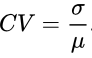

In [80]:
cv_mig = (df_eu_2021["Immigration"].std() / df_eu_2021["Immigration"].mean())*100
cv_GDP_capita = (df_eu_2021["GDP_per_capita"].std() / df_eu_2021["GDP_per_capita"].mean())*100
cv_GDP = (df_eu_2021["GDP"].std() / df_eu_2021["GDP"].mean())*100
cv_ine = (df_eu_2021["Inequality_of_income_distribution"].std() / df_eu_2021["Inequality_of_income_distribution"].mean())*100
cv_un = (df_eu_2021["Unemployment_rate"].std() / df_eu_2021["Unemployment_rate"].mean())*100
cv_ex = (df_eu_2021["Expenditure_on_social_protection"].std() / df_eu_2021["Expenditure_on_social_protection"].mean())*100
cv_GDP_hab = (df_eu_2021["GDP_per_hab"].std() / df_eu_2021["GDP_per_hab"].mean())*100

print("The coefficient of variation of the immigration variable is ", cv_mig)
print("The coefficient of variation of the GDP per capita variable is ", cv_GDP_capita)
print("The coefficient of variation of the GDP variable is ", cv_GDP)
print("The coefficient of variation of the inequality of income distribution variable is ", cv_ine)
print("The coefficient of variation of the unemployment rate variable is ", cv_un)
print("The coefficient of variation of the expenditure for social protection variable is ", cv_ex)
print("The coefficient of variation of the GDP per hab variable is ", cv_GDP_hab)

The coefficient of variation of the immigration variable is  138.53796771908782
The coefficient of variation of the GDP per capita variable is  65.95933059825181
The coefficient of variation of the GDP variable is  156.18923138154858
The coefficient of variation of the inequality of income distribution variable is  25.292689566892456
The coefficient of variation of the unemployment rate variable is  43.612486952994075
The coefficient of variation of the expenditure for social protection variable is  24.88602383992328
The coefficient of variation of the GDP per hab variable is  69.06990595289757


We can agree now immigration data is really spread out : the standard deviation compared to the mean is large by 139% . Same for the GDP's variables :  per capita : 65% larger, GDP 156%, GDP per hab 69% larger.

The others one are large also, but lower large.

# Descriptive analysis <a class="anchor" id="analysis"></a>

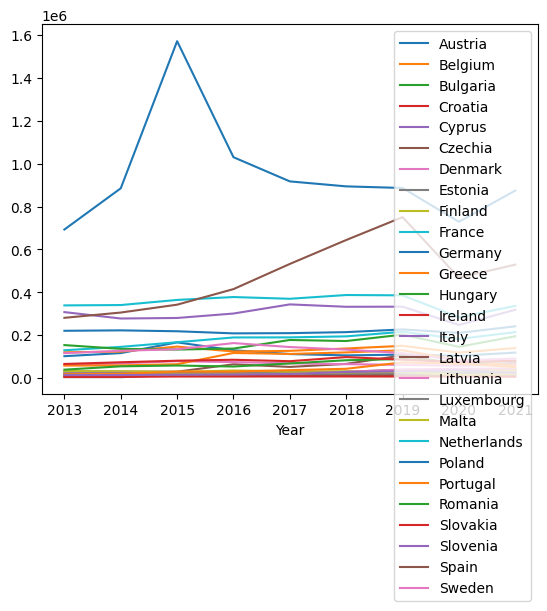

In [81]:
df_eu.pivot(index="Year", columns="Country", values="Immigration").plot()
plt.legend(loc='upper right')

Even if we can't see all the lines distinctly, we can this Germany is the most migrants populated country in the EU27 over time.

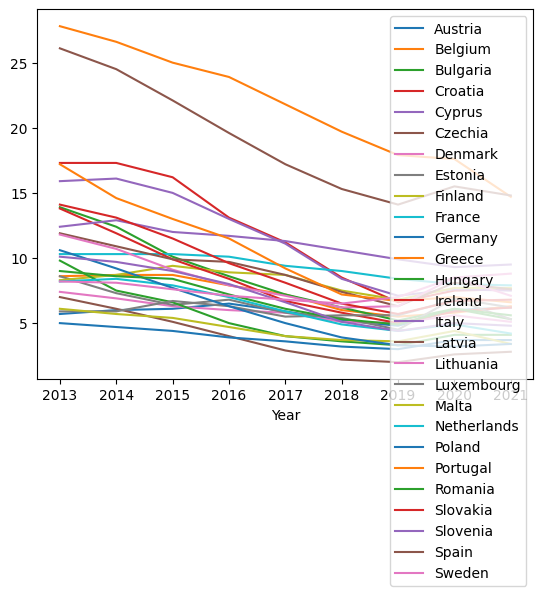

In [82]:
df_eu.pivot(index="Year", columns="Country", values="Unemployment_rate").plot()
plt.legend(loc='upper right')

We can see Germany is not the one with the highest unemployment rate. It get a first look of relationship between unemployment rate and immigration.

## Visualization : Immigration and GDP per hab <a class="anchor" id="visualization1"></a>

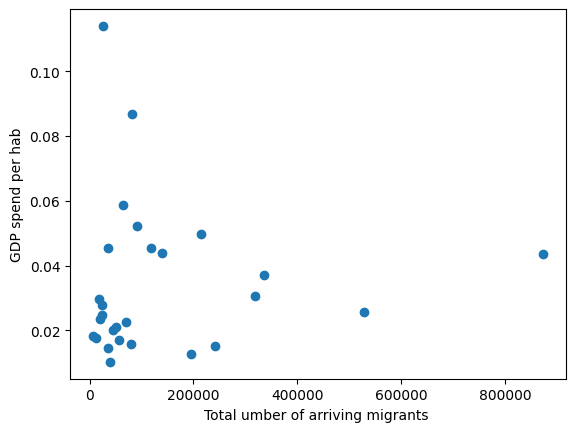

In [83]:
fig, ax = plt.subplots()

ax.scatter(df_eu_2021["Immigration"], df_eu_2021["GDP_per_hab"])
ax.set_xlabel("Total umber of arriving migrants ")
ax.set_ylabel("GDP spend per hab")
plt.rcParams['figure.figsize'] = [10, 5] 

plt.show()

For interpretation, it's quite hard to determine if there is a linear relationship between these 2 variables, mostly due by the low amount of data. Despite that, we can still find a way to interpret and find a relationship even if it will not be precise like if we had a lot of data.

We can see that we have some high values of GDP per hab and immigration, and we might want to know which countries are. 

To do that, we have to define these outliers :

In [84]:
outliers = df_eu_2021.loc[df_eu_2021["GDP_per_hab"]>0.05, ["Country","Immigration", "GDP_per_hab"]]
outliers

,Country,Immigration,GDP_per_hab
1276,Denmark,63489.0,0.058726
1279,Ireland,80732.0,0.086704
1288,Luxembourg,25335.0,0.114003
1299,Sweden,90631.0,0.052097


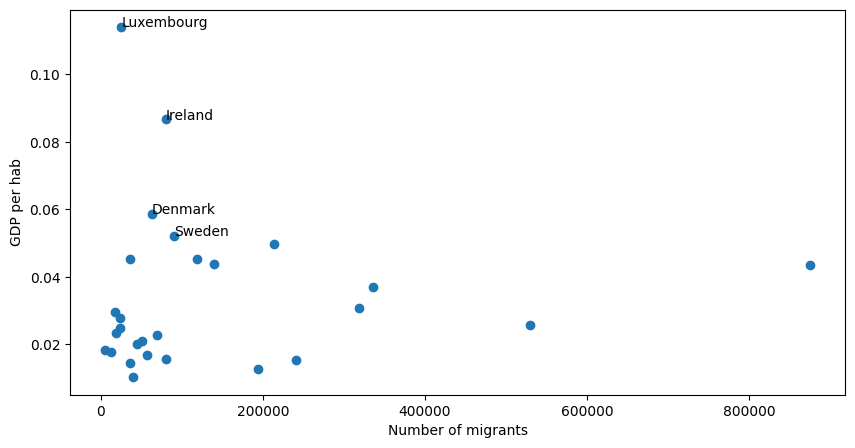

In [85]:
fig, ax = plt.subplots()
ax.scatter(x=df_eu_2021.Immigration, y=df_eu_2021.GDP_per_hab)
ax.set_xlabel("Number of migrants")
ax.set_ylabel("GDP per hab")
for index, outlier in outliers.iterrows():
    ax.text(outlier.Immigration, outlier.GDP_per_hab, outlier.Country)

Searching for relationship means tend to find a linear one. To do so, the log transformation of variable is helpful. It helps to transform datasets to achieve linearity . This means it can help to obtain further insights into our data that may not be obvious at first.

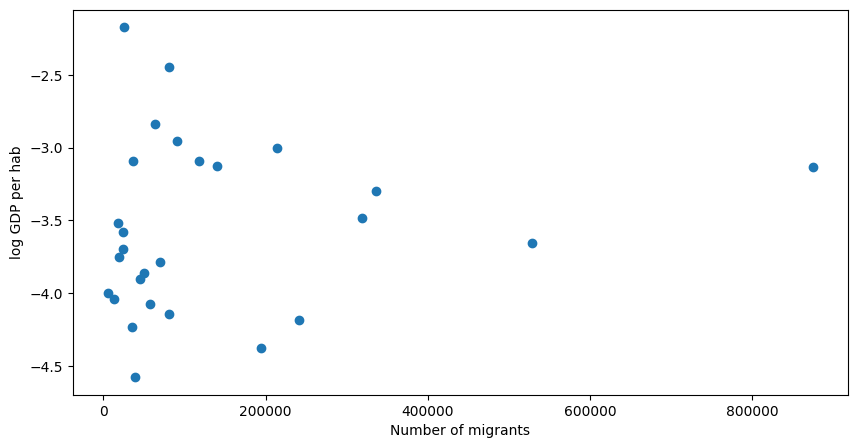

In [86]:
fig, ax = plt.subplots()
ax.scatter(df_eu_2021["Immigration"], np.log(df_eu_2021["GDP_per_hab"]))
ax.set_xlabel("Number of migrants")
ax.set_ylabel("log GDP per hab")
plt.rcParams['figure.figsize'] = [10, 5]

We can also do log transformation on both side :

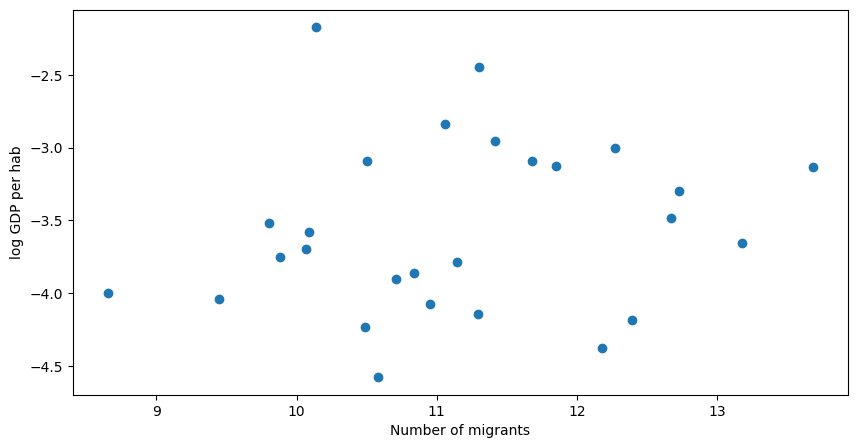

In [87]:
fig, ax = plt.subplots()
ax.scatter(np.log(df_eu_2021["Immigration"]), np.log(df_eu_2021["GDP_per_hab"]))
ax.set_xlabel("Number of migrants")
ax.set_ylabel("log GDP per hab")
plt.rcParams['figure.figsize'] = [10, 5]

With log transformation on both side, values - so each point on the plot - are more spread out.

The reason for doing this log transformation is that now that both x and y variables are interpreted as rates-of-change, then the estimated slope of the line through the data can be interpreted as an elasticity : if the immigration  level changes by 1%, the GDP per hab changes also by 1%.

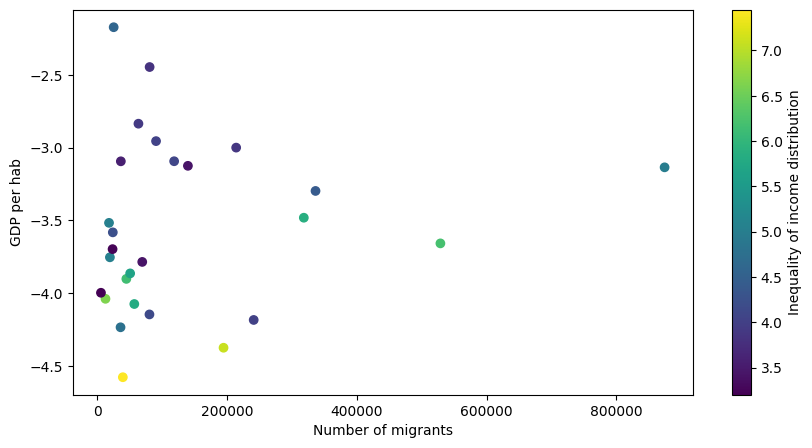

In [88]:
fig, ax = plt.subplots()
s = ax.scatter(df_eu_2021["Immigration"], np.log(df_eu_2021["GDP_per_hab"]),
               c=df_eu_2021["Inequality_of_income_distribution"])
ax.set_xlabel("Number of migrants")
ax.set_ylabel("GDP per hab")
plt.rcParams['figure.figsize'] = [10, 5]

cb = plt.colorbar(s, ax=ax)
cb.set_label("Inequality of income distribution")

We can firstly see, the yellow point which is the country with the highest ratio of inequality of income distribution which also have low immigration level.

In [89]:
BIG = df_eu_2021.loc[df_eu_2021["Population"]>50000000]
BIG

,Country,Year,Immigration,Population,GDP_per_capita,GDP,Inequality_of_income_distribution,Unemployment_rate,Expenditure_on_social_protection,GDP_per_hab
1277,Germany,2021.0,874367.0,83155031.0,35630.0,3617450.0,4.98,3.7,31.9,0.043502
1282,France,2021.0,336398.0,67656682.0,32490.0,2502118.0,4.41,7.9,35.8,0.036983
1284,Italy,2021.0,318366.0,59236213.0,27120.0,1822344.5,5.86,9.5,31.8,0.030764


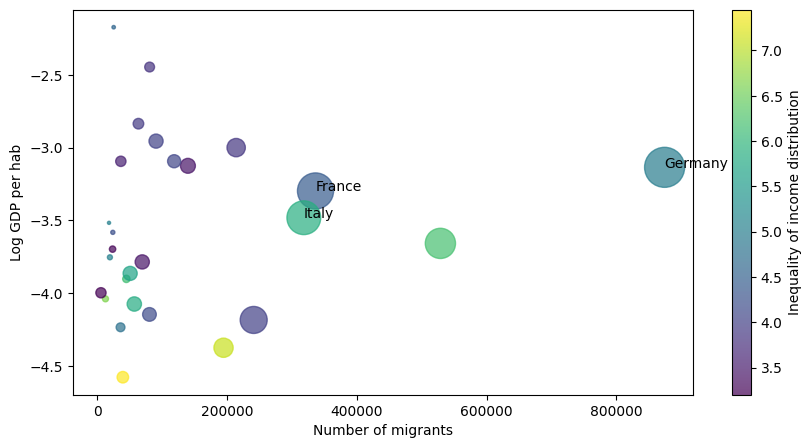

In [90]:
fig, ax = plt.subplots()
s=ax.scatter(df_eu_2021["Immigration"], np.log(df_eu_2021["GDP_per_hab"]),
               c=df_eu_2021["Inequality_of_income_distribution"], s=df_eu_2021["Population"]/100000, alpha=0.7)

for index, country in BIG.iterrows():
    s.axes.text(country.Immigration, np.log(country.GDP_per_hab), country.Country)
    
ax.set_xlabel("Number of migrants")
ax.set_ylabel("Log GDP per hab")
cb = plt.colorbar(s, ax=ax)
cb.set_label("Inequality of income distribution")

This plot make a great overview of severals variables. We can see Germany is the country with the highest number of arriving migrants but which not the one with the lowest GDP per hab. It gets a first overview of number of migrants might not lead to decrease of GDP. 

We can plot with regression line :

/var/folders/tk/0xym9v9j3gn__gg0h2gwln9c0000gn/T/ipykernel_1836/2546201852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eu_2021["log_GDP_hab"] = np.log(df_eu_2021["GDP_per_hab"])


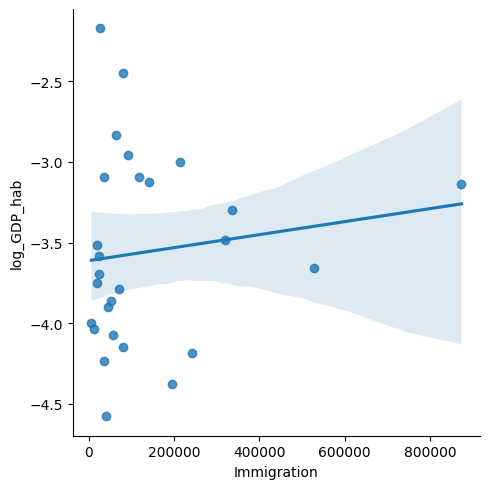

In [91]:
df_eu_2021["log_GDP_hab"] = np.log(df_eu_2021["GDP_per_hab"])
sns.lmplot(x="Immigration", y="log_GDP_hab", ci=95, data=df_eu_2021)

The regression line has a positive slope which means immigration and GDP per hab has a positive relationship. The more a country is populated by migrants, the more the GDP per hab increases.

However, the shaded area which represents the area where we are at 95% level of confidence is large, too large. It due by the low amount of data we have : the more data we have, the more precise and little the shaded area will be.

To conclude, it's still enough precise to say about the relationship.

## Visualization : Immigration and unemployment rate <a class="anchor" id="visualization2"></a>

Even if Matplotlib allows us to make charts on a 3-dimensional axis, we have to remember it could be difficult to read and interpret.

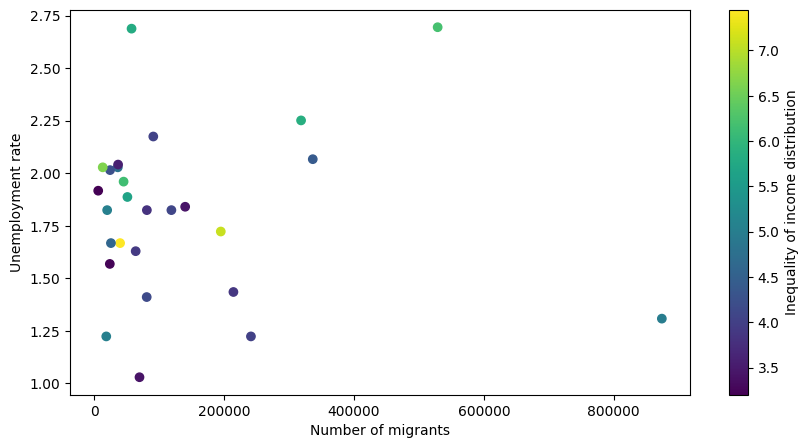

In [92]:
fig, ax = plt.subplots()
s = ax.scatter(df_eu_2021["Immigration"], np.log(df_eu_2021["Unemployment_rate"]),
               c=df_eu_2021["Inequality_of_income_distribution"])
ax.set_xlabel("Number of migrants")
ax.set_ylabel("Unemployment rate")
plt.rcParams['figure.figsize'] = [10, 5]

cb = plt.colorbar(s, ax=ax)
cb.set_label("Inequality of income distribution")

It seems there is no proper relationship in this plot between immigration and unemployment rate. For example, it seems to have a concentration of points at the same low level of immigration but with really different level of unemployment rate.

Therefore, it allows us to search more deeply on the relationship between migration rate and economic variables.

We can try to see in more details the relationship by drawing the regression line :

/var/folders/tk/0xym9v9j3gn__gg0h2gwln9c0000gn/T/ipykernel_1836/2754848687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eu_2021["log_unemployment"] = np.log(df_eu_2021["Unemployment_rate"])


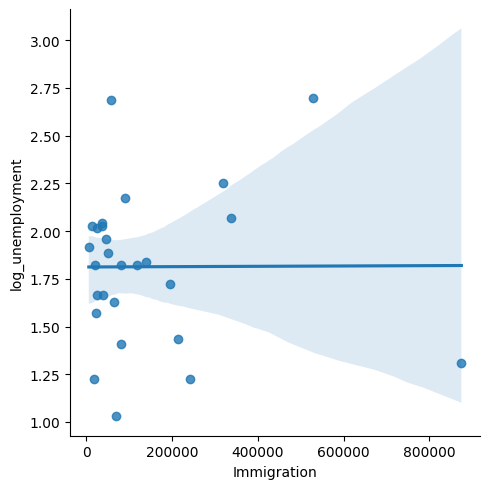

In [93]:
df_eu_2021["log_unemployment"] = np.log(df_eu_2021["Unemployment_rate"])
sns.lmplot(x="Immigration", y="log_unemployment", ci=95, data=df_eu_2021)

The regression line has a constant slope which means immigration and log unemployment rate might not have a linear relationship.

However, the shaded area which represents the area where we are at 95% level of confidence is large, too large. It due by the low amount of data we have : the more data we have, the more precise and little the shaded area will be.

To conclude, it's still enough precise to say about the relationship.

Now, let's have a look of the repartition of the migration rate :

<Axes: >

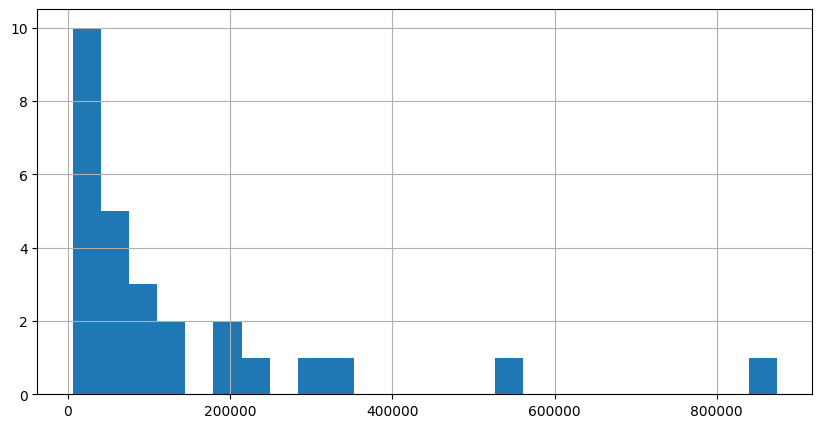

In [94]:
df_eu_2021["Immigration"].hist(bins=25)

It's not look particulary normal distributed, but if we log transformate :

In [95]:
np.log(df_eu_2021["Immigration"])

1273    11.847560
1274    10.583068
1275    11.147066
1276    11.058622
1277    13.681255
1278     9.879400
1279    11.298890
1280    10.952910
1281    13.178471
1282    12.726050
1283    10.488827
1284    12.670957
1285    10.085851
1286     9.448491
1287    10.711257
1288    10.139942
1289    11.295652
1290     9.806316
1291    12.274222
1292    11.682761
1293    12.393033
1294    10.834095
1295    12.178917
1296    10.070018
1297     8.653994
1298    10.501335
1299    11.414552
Name: Immigration, dtype: float64

(array([1., 1., 5., 3., 5., 3., 2., 4., 2., 1.]),
 array([ 8.65399423,  9.15672036,  9.65944648, 10.16217261, 10.66489873,
        11.16762485, 11.67035098, 12.1730771 , 12.67580323, 13.17852935,
        13.68125547]),
 <BarContainer object of 10 artists>)

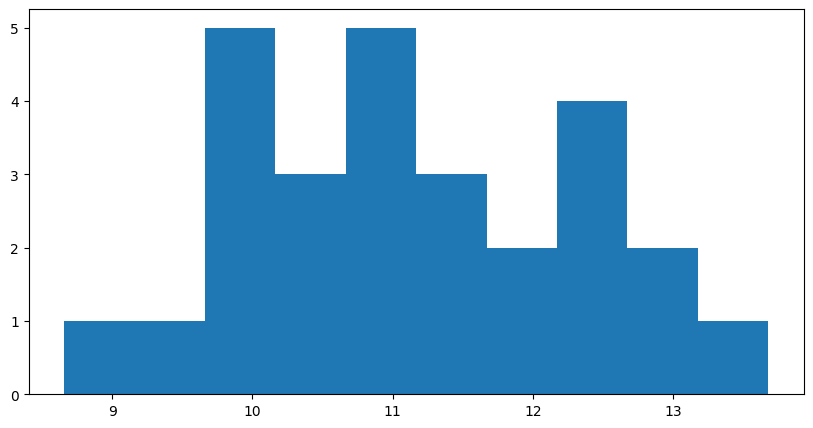

In [96]:
plt.hist(np.log(df_eu_2021["Immigration"]))

With log transformation, the distribution of immigration variable not seems to become normal-ish. To verify if this distribution can be use as a normal one, let's test if the number of country with more than 165 000 of migrants arriving is the same with the normal distribution :

In [97]:
mig_mean = df_eu_2021["Immigration"].mean()
mig_std = df_eu_2021["Immigration"].std()

print(mig_mean, mig_std)

138676.92592592593 192120.1948730826


Let's assuming that we have a normal distribution. So, we can simulate our solution to the question of how many time we expect that the level of immigration will be above 165 000

In [98]:
#simulate 100,000 draws from a normal distribution with the mean and st.dev found above:
n=100000
migsim = np.random.normal(mig_mean, mig_std, n)

### calculate the proportion of percentage above 10% according to the normal estimate
normEst = np.sum(migsim>165000)/n

### the actual number
realProp = np.sum(df_eu_2021["Immigration"]>165000)/df_eu_2021["Immigration"].count()

In [99]:
normEst

0.44598

In [100]:
realProp/normEst

0.5813248559560054

We can see the real number and the normal one are pretty the same. So, we can say our distribution of migration rate can be qualified as a normal distribution.

In [101]:
df_eu_2021.describe()

,Year,Immigration,Population,GDP_per_capita,GDP,Inequality_of_income_distribution,Unemployment_rate,Expenditure_on_social_protection,GDP_per_hab,log_GDP_hab,log_unemployment
count,27.0,27.000000,2.700000e+01,27.000000,2.700000e+01,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2021.0,138676.925926,1.655558e+07,28489.629630,5.422248e+05,4.765926,6.637037,24.470370,0.034224,-3.556279,1.813100
std,0.0,192120.194873,2.227635e+07,18791.568994,8.468968e+05,1.205431,2.894577,6.089702,0.023638,0.593645,0.400268
min,2021.0,5733.000000,5.161000e+05,6950.000000,1.532730e+04,3.200000,2.800000,13.600000,0.010274,-4.578146,1.029619
25%,2021.0,30623.500000,3.416018e+06,15535.000000,6.475760e+04,3.905000,4.950000,19.100000,0.017989,-4.018226,1.598928
50%,2021.0,63489.000000,8.932664e+06,23320.000000,2.382495e+05,4.410000,6.200000,22.900000,0.025787,-3.657869,1.824549
75%,2021.0,167192.500000,1.451509e+07,36485.000000,5.243318e+05,5.725000,7.600000,30.350000,0.044651,-3.108997,2.028148
max,2021.0,874367.000000,8.315503e+07,86690.000000,3.617450e+06,7.450000,14.800000,35.800000,0.114003,-2.171534,2.694627


We can also have a look on the coefficent of correlation between the migration rate and the poverty rate :

In [102]:
cc = np.corrcoef([df_eu_2021["Immigration"], df_eu_2021["Unemployment_rate"]])
cc

array([[1.        , 0.10128033],
       [0.10128033, 1.        ]])

Unfortunately, the coefficient is too low to conclude there is a real relationship between immigration and unemployment rate.

Despite that, let's search another way to express this correlation :

In [103]:
df_eu_2021.corr()

/var/folders/tk/0xym9v9j3gn__gg0h2gwln9c0000gn/T/ipykernel_1836/4278638493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_eu_2021.corr()


,Year,Immigration,Population,GDP_per_capita,GDP,Inequality_of_income_distribution,Unemployment_rate,Expenditure_on_social_protection,GDP_per_hab,log_GDP_hab,log_unemployment
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Immigration,NaN,1.000000,0.916326,0.051113,0.914963,0.141181,0.101280,0.472834,0.028403,0.130384,0.004229
Population,NaN,0.916326,1.000000,-0.018957,0.949660,0.138108,0.140359,0.546561,-0.048063,0.056686,0.065618
GDP_per_capita,NaN,0.051113,-0.018957,1.000000,0.147593,-0.405382,-0.072401,0.216550,0.993825,0.952751,-0.023261
GDP,NaN,0.914963,0.949660,0.147593,1.000000,0.025948,0.059864,0.597806,0.118549,0.250617,0.015322
Inequality_of_income_distribution,NaN,0.141181,0.138108,-0.405382,0.025948,1.000000,0.336588,-0.242668,-0.370666,-0.492573,0.327343
Unemployment_rate,NaN,0.101280,0.140359,-0.072401,0.059864,0.336588,1.000000,0.249222,-0.118021,-0.080189,0.961190
Expenditure_on_social_protection,NaN,0.472834,0.546561,0.216550,0.597806,-0.242668,0.249222,1.000000,0.166136,0.373346,0.237414
GDP_per_hab,NaN,0.028403,-0.048063,0.993825,0.118549,-0.370666,-0.118021,0.166136,1.000000,0.940012,-0.064629
log_GDP_hab,NaN,0.130384,0.056686,0.952751,0.250617,-0.492573,-0.080189,0.373346,0.940012,1.000000,-0.033131


If we take a look on the second column, the immigration one, we can interpret as : if the number of migrants increases in a country by 1% ;

- the GDP per capita will increase by 5.1%
- the GDP will increase by 91.5%
- the inequality of income distribution will increase by 14.1%
- the unemployment rate will increase by 10.1%
- the expenditure on social protection will increase by 47.3%
- the GDP per hab will increase by 2.8%


We can see a first overview of the correlation between migration rate and economic variables : migrants have a positive effect on GDP, so the growth of the economy.

# Simple regression <a class="anchor" id="simplereg"></a>

In my point of view, to know about the relationship between mirgation rate and economic variables, the most useful concept is the regression.

First of all, we are going to do a simple regression : 

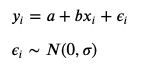

With y the dependent variable, x the explanatory variable and "e" the term error assumed close to 0.

For our regression : 

                                unemployment_rate = a + b*migration_rate + e

Where unemployment_rate is the dependent variable and migration_rate is the explanatory one.

In [104]:
df_eu_2021.head()

,Country,Year,Immigration,Population,GDP_per_capita,GDP,Inequality_of_income_distribution,Unemployment_rate,Expenditure_on_social_protection,GDP_per_hab,log_GDP_hab,log_unemployment
1273,Belgium,2021.0,139743.0,11554767.0,36230.0,507929.6,3.42,6.3,30.0,0.043958,-3.124511,1.840550
1274,Bulgaria,2021.0,39461.0,6916548.0,6950.0,71060.1,7.45,5.3,18.9,0.010274,-4.578146,1.667707
1275,Czechia,2021.0,69360.0,10494836.0,18020.0,238249.5,3.43,2.8,21.9,0.022702,-3.785320,1.029619
1276,Denmark,2021.0,63489.0,5840045.0,50740.0,342961.7,3.93,5.1,30.7,0.058726,-2.834875,1.629241
1277,Germany,2021.0,874367.0,83155031.0,35630.0,3617450.0,4.98,3.7,31.9,0.043502,-3.134937,1.308333


In [105]:
mod1 = smf.ols(formula='Unemployment_rate~Immigration', data=df_eu_2021).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Unemployment_rate   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.2591
Date:                Wed, 13 Dec 2023   Prob (F-statistic):              0.615
Time:                        18:25:20   Log-Likelihood:                -66.359
No. Observations:                  27   AIC:                             136.7
Df Residuals:                      25   BIC:                             139.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.4254      0.702      9.158      0.000       4.980       7.870
Immigration  1.526e-06      3e-06      0.509      0.615   -4.65e-06     7.7e-06
==============================================================================
Omnibus:                       12.702   Durbin-Watson:                   0.902
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.083
Skew:                           1.293   Prob(JB):                      0.00238
Kurtosis:                       5.013   Cond. No.                     2.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see if there is no migrants in a region, the unemployment rate would be at 6.4%. This is called the point estimate, "the y intercept", alpha. Nevertheless, its standard error is at 0.7.

Beta is the slope of the regression line, which is here close to 0 (0,000001526), and its standard deviation is also close to 0 : the variation of the explanatory variable immigration doesn't explain the variation of the dependent variable unemployment rate.

We can also add the value of R square : 0.01. Its means the variation of the immigration variable explains only 1% of the variation of the unemployment rate variable. But we expected a low level of R square because most of the times, simple regression doesn't reflect completely the relationship between 2 variables.

We can conclude here, unemployment doesn not depend on immigration.

We can also estimate of the standard deviation of our model ($\sigma$), by first getting the mean squared error of our regression-that is measuring the vertical distance between our regression line and the actual data points, squaring these and taking the mean. This is an estimate of our model variance. Taking the square root, will give us an estimate of our standard deviation, called our residual standard deviation:

In [106]:
np.sqrt(mod1.mse_resid)

2.9367219415458514

So we can say that the immigration accurately predicts unemployment rate with about 2.94 error on average.

More precisely, we can say that 68% of the predicted unemployment rate values will be within ∓ 2.94 of the real values.

Let's add the regression line of the estimated relationship :

In [107]:
mod1.params

Intercept      6.425425
Immigration    0.000002
dtype: float64

In [108]:
a_hat = mod1.params[0]
b_hat = mod1.params[1]

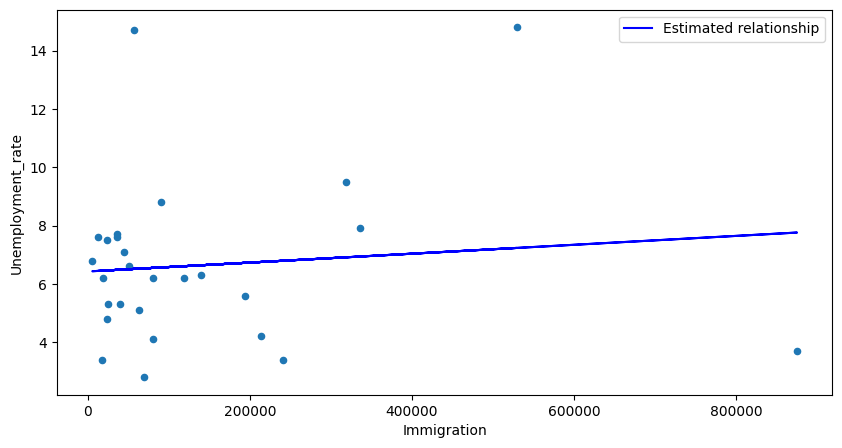

In [109]:
fig, ax = plt.subplots()
df_eu_2021.plot.scatter(x="Immigration", y="Unemployment_rate", ax=ax)
ax.plot(df_eu_2021["Immigration"], a_hat + b_hat*df_eu_2021["Immigration"], color="blue", label="Estimated relationship")
plt.legend()

Even if we have a regression line, it's not really interesting due to a not rally defined relationship between these 2 variables.

Let's try if our model can predict the percentage of migrants in France :

In [110]:
fr_mig = df_eu_2021["Immigration"].loc[df_eu_2021.Country=="France"]

In [111]:
fr_pred = mod1.predict(fr_mig)
fr_pred

1282    6.938747
dtype: float64

The model predict 6.9% of unemployment rate in France in 2021.

The actual rate is :

In [112]:
df_eu_2021.Unemployment_rate.loc[df_eu_2021.Country=="France"]

1282    7.9
Name: Unemployment_rate, dtype: float64

We have 1 point of percentage of difference : the model underestimate it.

Let's see with a 95% confidence interval :

In [113]:
fr_pred2 = mod1.get_prediction(fr_mig)

In [114]:
pred_CI = fr_pred2.conf_int()
pred_CI

array([[5.25200239, 8.62549229]])

We can see it's quite a good prediction : the actual value 7.9% is included in the CI at 95% level of confidence.

_For the visualization of uncertainty below, I was helped by ChatGPT : i asked him how to visualize the uncertainty of a simple regression and he explained to me the code that I modified with our variables. Then, I plotted the result._

_I also asked him if it's possible to have a vertical confidence interval and I used its anwser to interpret the plot._

In [115]:
un_pred = mod1.predict(df_eu_2021.Immigration)

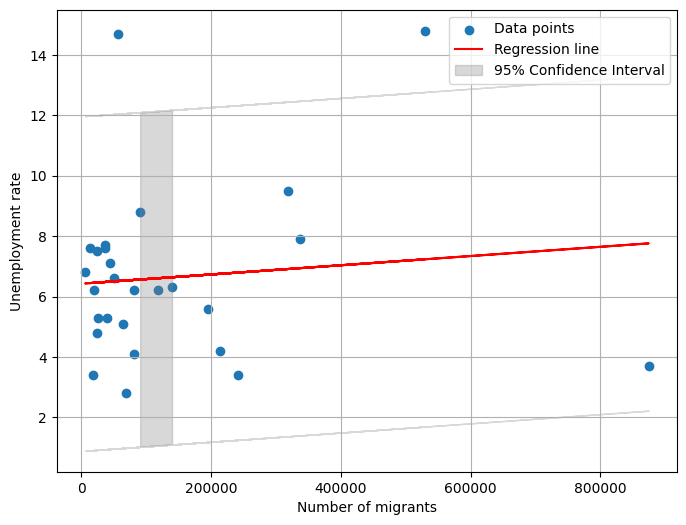

In [116]:
# Plotting the regression line and data points
plt.figure(figsize=(8, 6))
plt.scatter(df_eu_2021.Immigration, df_eu_2021.Unemployment_rate, label='Data points')
plt.plot(df_eu_2021.Immigration, un_pred, color='red', label='Regression line')

# Calculate confidence intervals
residuals = df_eu_2021.Unemployment_rate - un_pred
std_error = np.std(residuals)
confidence = 1.96  # 95% confidence interval
upper_bound = un_pred + (confidence * std_error)
lower_bound = un_pred - (confidence * std_error)

# Fill between the upper and lower confidence intervals
plt.fill_between(df_eu_2021.Immigration.ravel(), upper_bound, lower_bound, alpha=0.3, color='gray', label='95% Confidence Interval')

plt.xlabel('Number of migrants')
plt.ylabel('Unemployment rate')
plt.legend()
plt.grid(True)
plt.show()

By definiton, the confidence interval of a simple regression represents the uncertainty around the estimated regression line (teh shaded area).

_ChatGPT said :_ 

_"If you're observing a vertical confidence interval, it might be due to the nature of your data. For instance, if the independent variable (X-axis) in your dataset has minimal variability, or if most of the data points cluster around a specific value on the X-axis, the confidence interval might seem vertical."_

Here, our x variable is the immigration one and the y is the unemployment rate variable. So the vertical CI might be the consequence of the low variability of the immigration variable. We can agree with that because in the plot, most of the dots are concentrated in an area close to 0. So the variability of the immigration variable is not high.

# Multiple regression <a class="anchor" id="multreg"></a>

In [117]:
mod2 = smf.ols(formula='Immigration~Unemployment_rate+GDP+GDP_per_capita+GDP_per_hab+Inequality_of_income_distribution+Expenditure_on_social_protection', data=df_eu_2021).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Immigration   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     20.00
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.77e-07
Time:                        18:25:21   Log-Likelihood:                -340.01
No. Observations:                  27   AIC:                             694.0
Df Residuals:                      20   BIC:                             703.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          4.383e+04   1.37e+05      0.319      0.753   -2.43e+05     3.3e+05
Unemployment_rate                  3154.3141   7852.303      0.402      0.692   -1.32e+04    1.95e+04
GDP                                   0.2216      0.026      8.506      0.000       0.167       0.276
GDP_per_capita                       -1.0861     11.101     -0.098      0.923     -24.242      22.070
GDP_per_hab                        4.917e+05   8.62e+06      0.057      0.955   -1.75e+07    1.85e+07
Inequality_of_income_distribution  8889.6000   2.02e+04      0.441      0.664   -3.32e+04    5.09e+04
Expenditure_on_social_protection  -3044.2635   3888.568     -0.783      0.443   -1.12e+04    5067.148
==============================================================================
Omnibus:                        6.579   Durbin-Watson:                   2.597
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                7.875
Skew:                           0.224   Prob(JB):                       0.0195
Kurtosis:                       5.608   Cond. No.                     5.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation :

- R square is high : 0.857 , the variation of all the explanatory variables explains 85.7% of the variation of the immigration.

- If all variables were at 0, the immigration will be at the level of 43 830 migrants arriving. But the standard error is high, we have to be prudent with it.

- For unemployment rate, the std error is too high, higher than the coefficient : the value is not enough precise.

- The GDP coefficient is at 0.2216 : each time GDP will grows by 1 euro, the immigration will increase by 0.2216. Its std error can be approximated by 0.

- GDP per capita coefficient is negative : in this model, the increase of GDP per capita lead to decrease of immigration. However, its std error is too large to take it into consideration.

- For the inequality variable, same thing : std error is quite large

- For the expenditure the sign of the coefficient is negative : increasing expenditure on social protection would decrease the immigration but we have also std error large.

To conclude, even if the R square is high, the std error of the explanatory variables are large and it's still hard to consider a real relationship and be confident about it.

To evaluate the assumptions and also the validity of our multiple regression model, we can plot the residuals versus fitted values :

In [118]:
residuals = mod2.resid

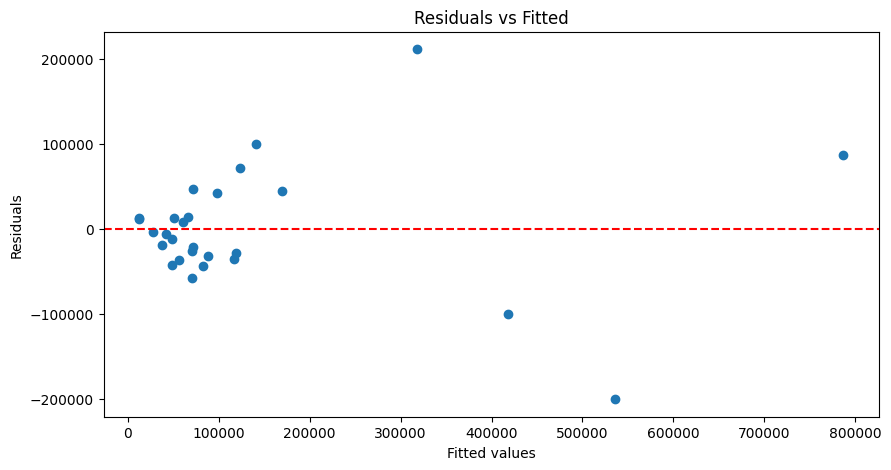

In [119]:
# Diagnostic plots
# 1. Residuals vs Fitted values
plt.scatter(mod2.fittedvalues, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

We can see that most of the dots are close to the level of 0 residual. It means that model's predictions are unbiased on average. However, some outliers are far away from the red line, meaning the residual is high and not close to 0.

### Time series analysis <a class="anchor" id="timeseries"></a>

We have our dataset which is a panel data. So we can use the method of time series analysis.

Let's try to analyze how unemployment rate changes over time and to forecast future values based on past observations. So the time series analysis could be a valuable choice.

The most important issues of this method are : stationarity and serial correlation.

Most of time series can be divided into two questions :

1. Is the series stable over time (stationary). If not, then making estimates from the limited sample we have will not be particularly informative, since in the next (unseen) sample period, the time series could look completely different. This is the essence of stationarity. However, if we have a non-stationary series, we can try to transform it to a stationary series. Here differencing is often a simple and effective strategy.


2. Once we have convinced ourselves that we are dealing with a stationary series, we then want to explore the dynamics (correlations) of the series and try to model that in the best possible way.

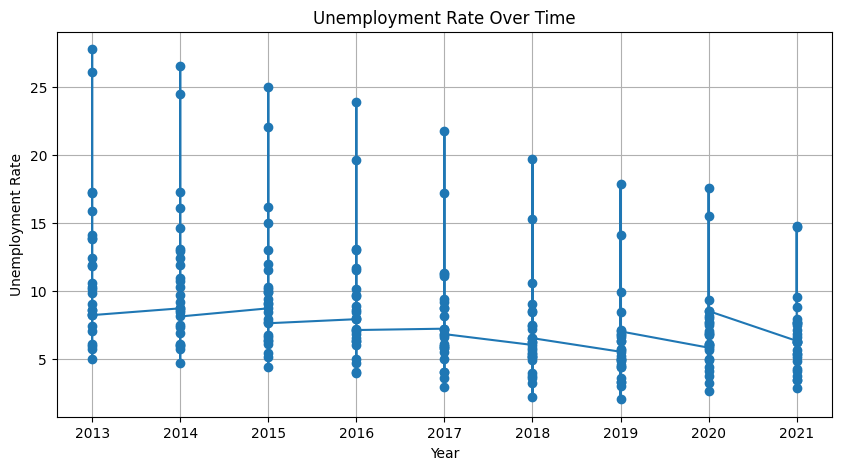

In [120]:
plt.plot(df_eu['Year'], df_eu['Unemployment_rate'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Over Time')
plt.grid(True)
plt.show()

In fact, the year variable in this dataset is not a continuous variable because we only have values for each year. This i why we have horisontal line between each year value. These lines show the global tendency : regrouping all the dots (which represents each country), and show how this tendency is (negative, positive). From 2013 to 2017, the tendencies between ecah year were positive : the global tendency of unemployment rate between each year was positive. It means the unemployment rate tends globally to increase in the EU27 during this period. But since 2017, the sign of the tendency have changed : it became negative. And the slope of the line have became higher over time. For exmaple for the line between 2020 and 2021 is quite high. 

In another hand, we can see unemployment rate of each country seems to put closer to each other so we can expect the variability of the unemployemnt rate of the EU27 over time decrease and get close to 0. For exmaple, in 2013, the maximum value of unemployment rate was more than 25%. Compared to the one of 2021 (15% approx.) it loosed 10 point of percentage. The range (distance between the max and the min value) tends to get decrease over time.

We can compare this plot with the same with immigration :

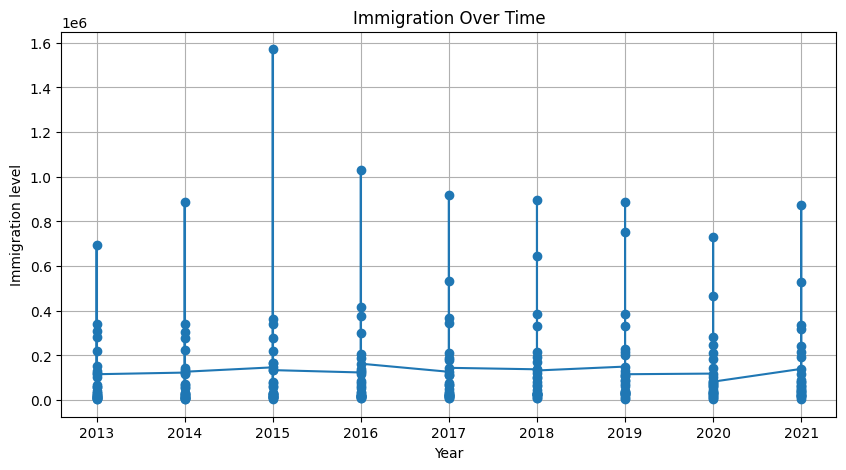

In [121]:
plt.plot(df_eu['Year'], df_eu['Immigration'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Immigration level')
plt.title('Immigration Over Time')
plt.grid(True)
plt.show()

The lines between each year seems to don't have a global tendency : it might be due to outlier/s which are quite far away from the other values which are close to each other. Also, the variance of the immigration seems to evolute not in a linear way. 

Otherwise, it seems country immigration globally tend to stay between 0 and 0.4. Below 0.4, we can consider data as outlier due to the distance with the "cluster" of the global data.

<Axes: >

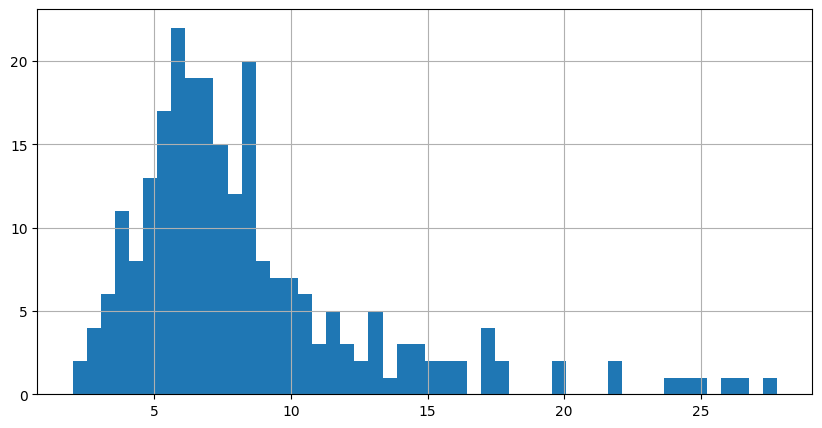

In [122]:
df_eu.Unemployment_rate.hist(bins=50)

It seems unemployment rate has a normal shape with positive tail due to values on the right.

# Fake data simulation : exploration of model validity <a class="anchor" id="fakedata"></a>

According to the ROS book : _"Most important is that the data you are analyzing should map to the research question you are trying to answer. This sounds obvious but is often overlooked or ignored because it can be inconvenient. Optimally, this means that the outcome measure should accurately reflect the phenomenon of interest, the model should include all relevant predictors, and the model should generalize to the cases to which it will be applied."_

So in this section, we are going to explore if our data is appropriate for ou project problematic. To do this, we are going to use the fake data simulation method.

First of all, let's create our fake data :

In [123]:
true_mean =  df_eu_2021.Immigration.mean()
true_std =  df_eu_2021.Immigration.std()
S = 100

fake = pd.Series(np.random.normal(true_mean,true_std,S))

<Axes: >

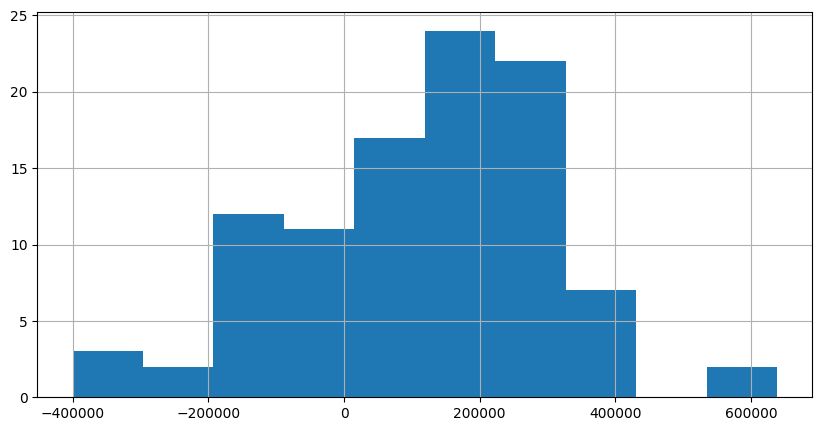

In [124]:
fake.hist()

This fake data is not appropriate due to the negative values : we can't have level of immigration negative.

To resolve this issue, we have to use the log-normal distribution and then transforming :

In [125]:
true_mean = df_eu_2021.Immigration.mean()
true_std =  df_eu_2021.Immigration.std()
S = 100

log_fake_mig = np.random.lognormal(mean=np.log(true_mean), sigma=true_std, size=S)

# Remove infinite or non-finite values
fake_mig = log_fake_mig[np.isfinite(log_fake_mig)]

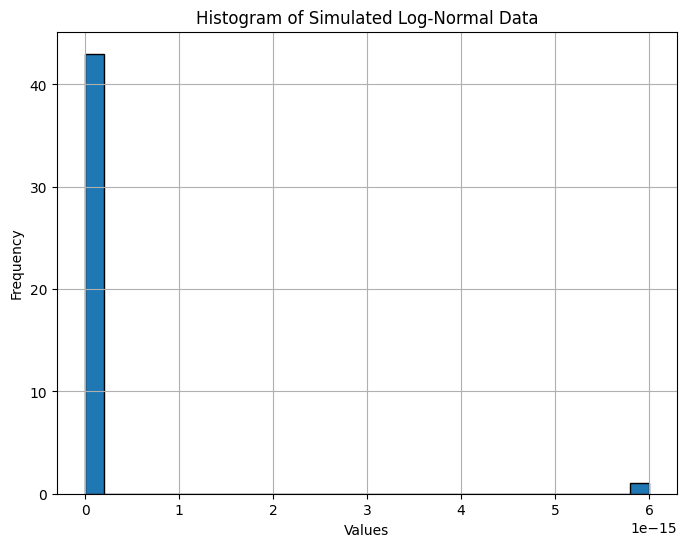

In [126]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(fake_mig, bins=30, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Simulated Log-Normal Data')
plt.grid(True)
plt.show()

Here, I was a bit confused by the outcome of this histogram, so I asked ChatGPT if it looks normal. 

He said : _"In a log-normal distribution, it's common to observe a pattern where the data clusters towards lower values (near zero) and extends to higher values, leading to a skewed distribution. The behavior you're observing in the histogram—significant frequency near zero and then a dropoff with fewer values but higher—reflects this characteristic of the log-normal distribution."_

But I don't really understand why this fake data is useful with the null data values.

So I decided to use the first fake data simulation, without log transformation and take only values non negative. I don't really know if we can do like this, but it useless with the null values fake data.

In [127]:
true_mean =  df_eu_2021.Immigration.mean()
true_std =  df_eu_2021.Immigration.std()
S = 100

fake_mig = pd.Series(np.random.normal(true_mean,true_std,S))

fake_mig = fake_mig[fake_mig>=0]

<Axes: >

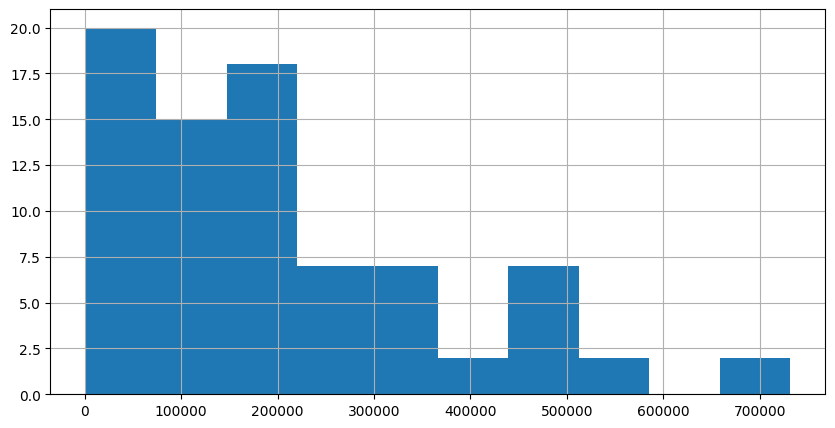

In [128]:
fake_mig.hist()

We can compute now the mean and the std deviation of this fake data :

In [129]:
mean_estimate = fake_mig.mean()
print("estimate of mean", mean_estimate)

estimate of mean 205096.84370767133


In [130]:
std_estimate = fake_mig.std()
print("estimate of mean", std_estimate)

estimate of mean 169091.09195770655


Now we can generate 1000 different sets of 100 draws from our "true" distribution(so the fake_mig), and then see the amount of variation there is of the means.

In [131]:
N = 1000
sampleMeans = []

for i in range(N):
    samp = np.random.normal(true_mean, true_std, S)
    sampleMeans.append(samp.mean())

<Axes: >

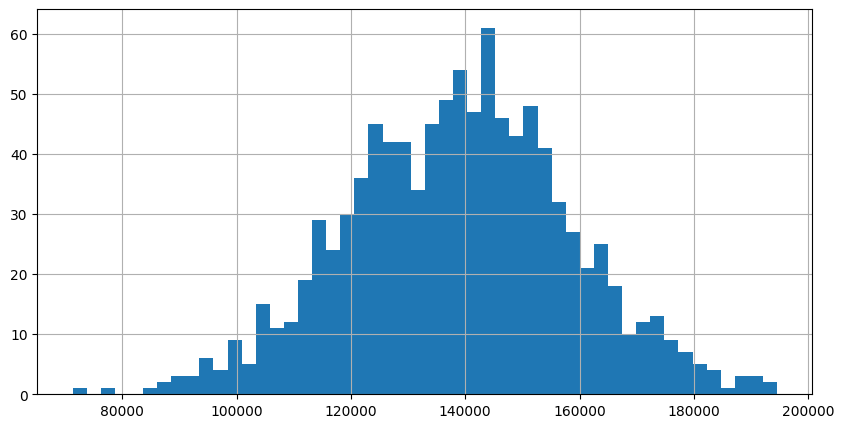

In [132]:
sampleMeans = pd.Series(sampleMeans)
sampleMeans.hist(bins=50)

In [133]:
SE1 = sampleMeans.std()
print(SE1)

19540.159532279245


The standard deviation of these sample means is equals to 19 096 approximatively.

In [134]:
mean_sampleMeans = sampleMeans.mean()
print(mean_sampleMeans)

138780.25344597024


In [135]:
cv_sampleMeans = SE1 / mean_sampleMeans
print("The coefficient of variation is ", cv_sampleMeans)

The coefficient of variation is  0.14079927833455497


It means in the sample means, the standard deviation larger than the mean by 14%. We can qualified the CV as low. So the stad deviation of the sample is low : data are not really spread out.

With the initial sample estimates, we can know the std deviation of the sample :

In [136]:
N = 10000
sampleMeans = []

for i in range(N):
    sample = np.random.normal(mean_estimate, std_estimate, S)
    sampleMeans.append(sample.mean())

In [137]:
sampleMeans =  pd.Series(sampleMeans)
SE2 =sampleMeans.std()
print(SE2)

16949.423898025696


We can see there is not so much difference between the 2 standard erros computed.

We can also calculate the Confidence Interval (CI):

In [138]:
CI_min = mean_estimate - 1*SE2
CI_max = mean_estimate + 1*SE2
print("CI = [", CI_min,";", CI_max,"]")

CI = [ 188147.41980964562 ; 222046.26760569704 ]


In [139]:
sampleMeans[(sampleMeans>CI_min)&(sampleMeans<CI_max)].count()/sampleMeans.count()

0.6842

It means we have in the sample means, 69% of our data in the Confidence Interval.

It also means 69% of our data is in the area of the mean +/- 1 std deviation.

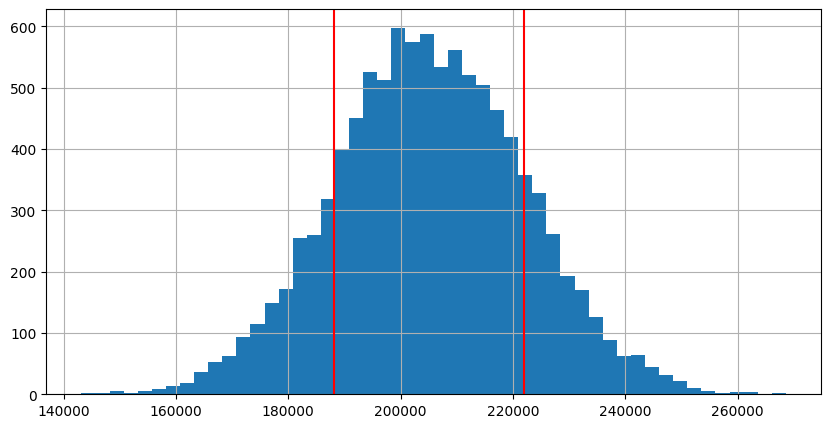

In [140]:
fig, ax =plt.subplots()
sampleMeans.hist(bins=50, ax=ax)
ax.axvline(CI_min, color="red")
ax.axvline(CI_max, color="red")

The red lines corresponds to the value of the estimated mean +/- the std deviation of the sample.

The area between the 2 red lines is the Confidence Interval. it represents also 69% of our data.

If we want to fake a little sample with low size value, we can use the t distribution instead of the normal one :

In [141]:
n = 5
mySample = np.random.normal(true_mean,true_std, n)

In [142]:
mySample = mySample[mySample>0]

In [143]:
s_mu = mySample.mean()
SE = mySample.std(ddof=1)/np.sqrt(n)

t_025 = spt.t(df=n-1).ppf(.975)

t_025

2.7764451051977987

In [144]:
CI_min2 = s_mu - SE*t_025
CI_max2 = s_mu + SE*t_025

print("Small-sample mean CI = [", CI_min2,";", CI_max2, "]")

Small-sample mean CI = [ -25488.938530684696 ; 258585.66760916327 ]


The more the size of the sample increases (n), the more the t distribution would tend to a normal one.

# Diagnostics & model evaluation <a class="anchor" id="diag"></a>

Remember our simple regression :

    mod1 = smf.ols(formula='Unemployment_rate~Immigration', data=df_eu_2021).fit()

In [145]:
#The function we use to make simulations of the data
def regSim(regMod): 
    #extract values from regression model
    nmk = regMod.df_resid #n-k
    sigma_hat = np.sqrt(regMod.mse_resid)
    bs_vcov = regMod.cov_params(scale=1)
    bs = regMod.params
    
    #create simulated values
    sigma_sim = sigma_hat*np.sqrt((nmk/np.random.chisquare(nmk,1)))
    V_sim = np.array(bs_vcov) * sigma_sim**2
    bs_sim = np.random.multivariate_normal(bs, V_sim, 1)
    
    return([bs_sim.flatten(), sigma_sim])

In [146]:
#Creating simulated data
nsim = 60

bs_sims = []
sigma_sims = []



for s in range(nsim):
    param_sim = regSim(mod1)
    bs_sims.append(param_sim[0])
    sigma_sims.append(param_sim[1])

In [147]:
min_mig = df_eu_2021['Immigration'].min()

In [148]:
max_mig = df_eu_2021['Immigration'].max()

In [149]:
fake_mig = np.random.uniform(low = min_mig, high = max_mig, size = 1000)

Now we can create the fake predictions of unemployment rate :

In [150]:
fake_pred = mod1.params[0] + mod1.params[1]*fake_mig

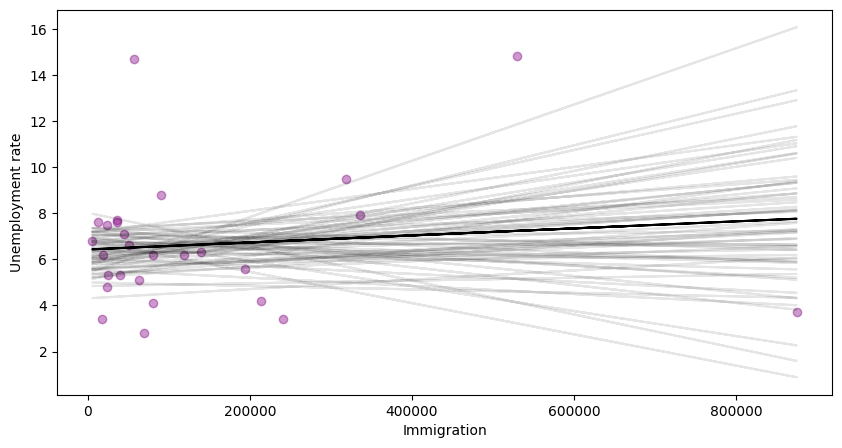

In [151]:
fig, ax = plt.subplots()

ax.scatter(x = df_eu_2021.Immigration, y = df_eu_2021.Unemployment_rate, alpha=.4, color="purple")
ax.plot(fake_mig, fake_pred, color="black")
ax.set_xlabel("Immigration")
ax.set_ylabel("Unemployment rate")

for i in range(nsim):
    y_line_sim = bs_sims[i][0] + bs_sims[i][1]*fake_mig
    ax.plot(fake_mig, y_line_sim, color="black", alpha=.1)

We can see with the grey lines that there is wide variability and diverge significantly from the regression line or scatter plot trend. It might be due to the difficulty of the model to capture the true relationship between immigration and unemployment rate. This variability might indicate overfitting or a lack of generalization.

From the plot, we observe that the model has some uncertainty. This was somewhat expected because the data doesn't have a clear linear pattern, and a lot the data is close to zero. 

However, in the model summary the standard deviation is very small. This indicates that model should be more certain, and therefor is not in line with the results we got in this plot. However, we see that some clustering of data in the corner might be the reason why the standard deviation is so small and the model seems to perform okay, even though the regression line doesn't fit the scatterd data well. This "cluster" contains most of the data points, and therefor these values impacts the model a lot more than the few data points with higher values, and because of this the score of the model is "artificially" good.

With a quite weak model, according to the uncertainty and the fit, we might conclude that the model has a low external validity.

We can also look at the relationship between residuals and predicted values to check the model evaluation :

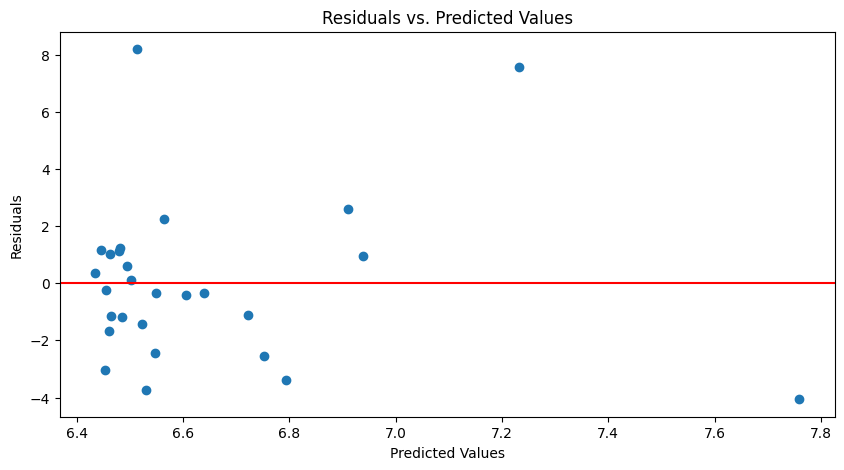

In [152]:
residuals = mod1.resid
predicted = mod1.fittedvalues

# Residuals vs. Predicted Plot
plt.scatter(predicted, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')  # Adding horizontal line at y=0
plt.title("Residuals vs. Predicted Values")
plt.show()

We can see there is a quite cluster of dots near the red line but they tend to the negtaive residuals values. It means most of the values are underestimate so the model tend to underestimate the unemployment rate. But we have also some outliers, we approximatively residuals equals to 8 which is large.

Let's see the distribution of the residuals. In a perfect world, it should a a mean near 0 because the more the mean of residuals tend to 0, the more the model predict well due to low distance between predicted values and real ones.

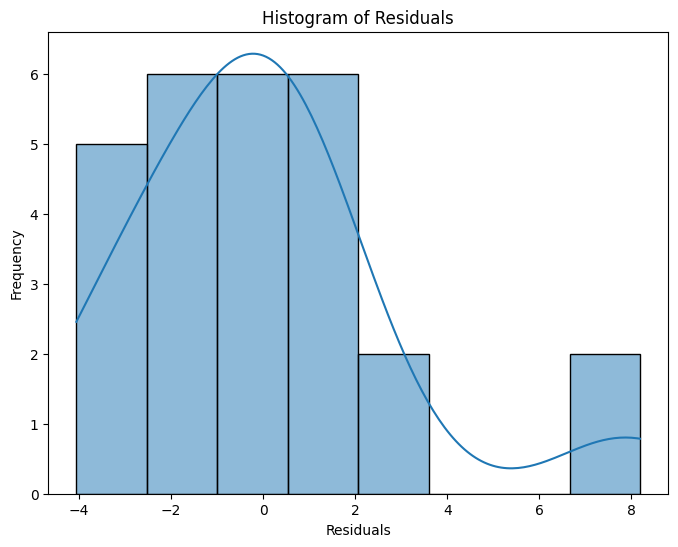

In [153]:
# Plotting histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)  # Using seaborn for a smooth density curve
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

Here, we can see a concentration of data near 0, but it more between -2 and 2. Also, there is an increase on the right side of the distribution - which contrast with the normal distribution - around the 7/8 values.

Let's for more details, what is the percentage of data near the mean 0 : the more this percentage is high the more the residuals distribution can be qualified as normal distribution.

In [154]:
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Define threshold (e.g., within ±1 standard deviation from the mean)
threshold = 1 * std_residuals

# Count data points within the threshold
near_mean = np.sum((residuals >= (mean_residuals - threshold)) & (residuals <= (mean_residuals + threshold)))

# Calculate percentage of data points near the mean
percentage_near_mean = (near_mean / len(residuals)) * 100
print(f"Percentage of data points within ±1 std from mean: {percentage_near_mean:.2f}%")

Percentage of data points within ±1 std from mean: 77.78%


So 77.78% of our residuals is +- 1 standard deviation from the mean. We can tell it's a high percentage and say our residuals distribution can be qualified as a normal one. 

It means our model (mod1) can captures the systematic part of the relationship between immigration variable and unemployment rate variable well.

# Identification & causality :  <a class="anchor" id="id&caus"></a>

### Matching method : without treatment and control groups

In [155]:
df_eu.head()

,Country,Year,Immigration,Population,GDP_per_capita,GDP,Inequality_of_income_distribution,Unemployment_rate,Expenditure_on_social_protection,GDP_per_hab
1,Belgium,2013.0,120078.0,11137974.0,33490.0,392880.0,3.81,8.6,30.0,0.035274
2,Bulgaria,2013.0,18570.0,7284552.0,5390.0,42056.2,6.59,13.9,17.6,0.005773
3,Czechia,2013.0,30124.0,10516125.0,15160.0,159461.5,3.40,7.0,19.9,0.015164
4,Denmark,2013.0,60312.0,5602628.0,44410.0,258742.7,4.01,7.4,34.5,0.046182
5,Germany,2013.0,692713.0,80523746.0,33330.0,2811350.0,4.60,5.0,29.2,0.034913


In [156]:
# Extracting features for similarity calculation
features = df_eu[["Immigration", "GDP_per_hab","Inequality_of_income_distribution", "Unemployment_rate",
                  "Expenditure_on_social_protection"]]  # Replace with your relevant features

# Calculate similarity metrics (Euclidean distance)
distances = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(features)
distances, indices = distances.kneighbors(features)

# Nearest neighbor indices for each observation (entity and time point)
print("Nearest Neighbors for Each Observation:")
for i, neighbors in enumerate(indices):
    print(f"Observation {i}: Neighbors -> {neighbors}")

# Example of further analysis with nearest neighbors
# Extract neighbors for a specific observation (entity and time point)
example_observation = 2  # Change this index as needed
neighbors_indices = indices[example_observation][1:]  # Exclude self from neighbors
neighbors_data = df_eu.iloc[neighbors_indices]
print(f"\nNeighbors of Observation {example_observation}:\n{neighbors_data}")

Nearest Neighbors for Each Observation:
Observation 0: Neighbors -> [  0 142 189]
Observation 1: Neighbors -> [  1 131 167]
Observation 2: Neighbors -> [  2 102  29]
Observation 3: Neighbors -> [  3 165  34]
Observation 4: Neighbors -> [  4 193 143]
Observation 5: Neighbors -> [ 5 32 24]
Observation 6: Neighbors -> [  6 137 138]
Observation 7: Neighbors -> [  7  70 192]
Observation 8: Neighbors -> [  8  65 198]
Observation 9: Neighbors -> [  9  36 225]
Observation 10: Neighbors -> [10 40 37]
Observation 11: Neighbors -> [11 35 92]
Observation 12: Neighbors -> [ 12 229  50]
Observation 13: Neighbors -> [ 13  94 202]
Observation 14: Neighbors -> [14 68 42]
Observation 15: Neighbors -> [ 15  82 120]
Observation 16: Neighbors -> [ 16 217 163]
Observation 17: Neighbors -> [ 17 148  37]
Observation 18: Neighbors -> [ 18 169 100]
Observation 19: Neighbors -> [ 19 208 154]
Observation 20: Neighbors -> [20 47 74]
Observation 21: Neighbors -> [ 21 140 113]
Observation 22: Neighbors -> [ 22 162  

This segment shows the details of the two nearest neighbors (index 499 and index 162) to Observation 2. These neighbors are Portugal (with 2016 as year value) and Czechia (with 2014 as year value) respectively. It displays various features such as country, year, immigration, population, GDP per capita, inequality of income distribution, unemployment rate, expenditure on social protection, and GDP per habitant for each neighbor.

Interpreting this information involves assessing the similarity or dissimilarity between the chosen observation and its neighbors based on the respective features. It helps in understanding the context or context-specific relationships among observations within your dataset. These nearest neighbors could provide insights into how similar or different the particular observation (Observation 2) is compared to others based on the provided features.

In this section we will talk about how I've attempted to establish causal relationships between variables in this analysis

In the simple regression model (with dependent variable unemployment explained by the immigration level), we found a positive slope for our regression line : the more a country is populated by migrants, the more the GDP per hab increases. However, the shaded area which represents the area where we are at 95% level of confidence is too large due to low amount of data we have : the more data we have, the more precise and little the shaded area will be.

We also have calculated the coefficient of correlation, which was too low - 0.1 - to conclude there has been a real relationship between immigration and unemployment rate.

In the matrix of correlation, we have found :

- the GDP per capita will increase by 5.1%
- the GDP will increase by 91.5%
- the inequality of income distribution will increase by 14.1%
- the unemployment rate will increase by 10.1%
- the expenditure on social protection will increase by 47.3%
- the GDP per hab will increase by 2.8%


Immigration has a positive effect on GDP, so the growth of the economy.

Otherwise, with the test if the number of country with more than 165 000 of migrants arriving is the same with the normal distribution, we have found that the distribution of migration rate can be qualified as a normal one.

In the simple regresion, with a slope close to 0 and a value of R square : 0.01. We can conclude here, unemployment doesn not depend on immigration or maybe not only.

In [157]:
np.sqrt(mod1.mse_resid)

2.9367219415458514

With 68% of the predicted unemployment rate values are within ∓ 2.94 of the real values.

We found vertical CI might be the consequence of the low variability of the immigration variable. We can agree with that because in the plot, most of the dots are concentrated in an area close to 0. So the variability of the immigration variable is not high.

With multiple regression, we have concluded due to high R-square and the large std errors of explanatory variables it's still hard to consider a real relationship and be confident about it.

In the residual vs fitted plots,we have seen that most of the dots are close to the level of 0 residual. It means that model's predictions are unbiased on average.

From the uncertainty plot, we observe that the model has some uncertainty. This was somewhat expected because the data doesn't have a clear linear pattern, and a lot the data is close to zero. 

However, in the model summary the standard deviation is very small. This indicates that model should be more certain, and therefor is not in line with the results we got in this plot. However, we see that some clustering of data in the corner might be the reason why the standard deviation is so small and the model seems to perform okay, even though the regression line doesn't fit the scatterd data well. This "cluster" contains most of the data points, and therefor these values impacts the model a lot more than the few data points with higher values, and because of this the score of the model is "artificially" good.

With a quite weak model, according to the uncertainty and the fit, we might conclude that the model has a low external validity.

In the resiudal vs predicted values, there has been a kind of cluster of dots near the red line but they tend to the negtaive residuals values. It means most of the values are underestimate so the model tend to underestimate the unemployment rate.

In the histogram of the residuals, we have seen a concentration of data near 0 : 77.78% of our residuals is +- 1 standard deviation from the mean. We can tell it's a high percentage and say our residuals distribution can be qualified as a normal one. 

It means our model (mod1) can captures the systematic part of the relationship between immigration variable and unemployment rate variable well.

# Conclusion <a class="anchor" id="conclu"></a>

It's quite hard to conclude that immigration is a burden for the economy in the EU27 due to the lack of confidence in the regression models. Also, it seems immigration doesn't have a direct and linear relationship between unemployment rate or GDP per habitant. The relationship might be more complex than just a regression line which is logic due to for exmaple social patterns, government policies on immigration, political influence and public opinion about immigration. All of these phenomenon are hard to show and quantify in such statistic method like here.

It would be more interesting to combine this research with social studies and thoughts to imrove the interpretation of results and also contrasts that data can show.

However, we saw some results that might help us to find the way to answer our problematic, like hints.

- For example, the fact that Germany is the country with the highest number of arriving migrants in the EU27 in 2021, but which not the one with the lowest GDP per hab. We can also had its unemployment rate was 3.7% which is really low and one of the lowest compared to the other countries. We can expect that number of migrants might not lead to decrease of GDP and maybe improving it by decreasing the unemployment rate.


  _This interpretation can be improve with comparing immigration policies of each country such as migrants workforce which has an impact on GDP per habitant._